## Importing Libraries Needed in This Notebook

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sbn 
sbn.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("Autoscout_Missing_Value.csv")
df = df0.copy()

In [3]:
# User Defined Function for first-looking to the features/columns

def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [4]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [5]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [6]:
df.isnull().sum()

Make_Model                     0
Location                       0
Price                          0
Body_Type                      0
Type                           0
Doors                          0
Mileage                        0
Gearbox                        0
Fuel_Type                      0
Seller                         0
Seats                          0
Engine_Size                    0
Gears                          0
CO2_Emissions                  0
Drivetrain                     0
Entertainment_Media            0
Safety_Security                0
Extras                         0
Empty_Weight                   0
Full_Service_History           0
Upholstery                     0
Energy_Efficiency_Class        0
Age                            0
power_kW                       0
Fuel_Consumption_comb          0
Comfort_Convenience_Package    0
dtype: int64

In [7]:
df.duplicated(keep=False).sum()

1671

In [8]:
numeric_col = df.select_dtypes(include="number")
display(numeric_col.columns)
numeric_col

Index(['Price', 'Doors', 'Mileage', 'Seats', 'Engine_Size', 'Gears',
       'CO2_Emissions', 'Empty_Weight', 'Age', 'power_kW',
       'Fuel_Consumption_comb'],
      dtype='object')

,Price,Doors,Mileage,Seats,Engine_Size,Gears,CO2_Emissions,Empty_Weight,Age,power_kW,Fuel_Consumption_comb
0,16950.0,5.0,120200.0,5.0,1595.0,5.0,98.0,1270.0,6.0,75.0,3.80
1,80900.0,4.0,5000.0,5.0,1.0,9.0,0.0,2355.0,0.0,215.0,4.50
2,69900.0,5.0,18900.0,5.0,1991.0,8.0,162.0,1555.0,2.0,310.0,8.40
3,46990.0,5.0,18995.0,5.0,1991.0,7.0,169.0,1455.0,2.0,225.0,7.30
4,16800.0,5.0,197000.0,5.0,2143.0,7.0,162.0,1545.0,7.0,100.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...
28625,37600.0,4.0,40345.0,4.0,1969.0,8.0,127.0,2077.0,3.0,288.0,6.30
28626,5499.0,4.0,145000.0,5.0,2435.0,5.0,217.0,1357.0,18.0,125.0,9.55
28627,7300.0,3.0,96000.0,4.0,1560.0,6.0,99.0,1356.0,11.0,84.0,5.90
28628,29900.0,4.0,94343.0,5.0,1969.0,8.0,149.0,1617.0,5.0,187.0,6.30


## Handling With Outliers

### price (Target/Label Variable)

In [10]:
first_looking("Price")

COLUMN NAME    :  Price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5021
--------------------------------
14990.0    222
12990.0    219
16990.0    186
19990.0    166
9990.0     160
          ... 
19112.0      1
30465.0      1
18461.0      1
22649.0      1
4440.0       1
Name: Price, Length: 5021, dtype: int64


In [13]:
df.Price.describe()

count    2.863000e+04
mean     2.355520e+04
std      2.595371e+04
min      4.900000e+02
25%      1.199000e+04
50%      1.798000e+04
75%      2.799000e+04
max      1.346900e+06
Name: Price, dtype: float64

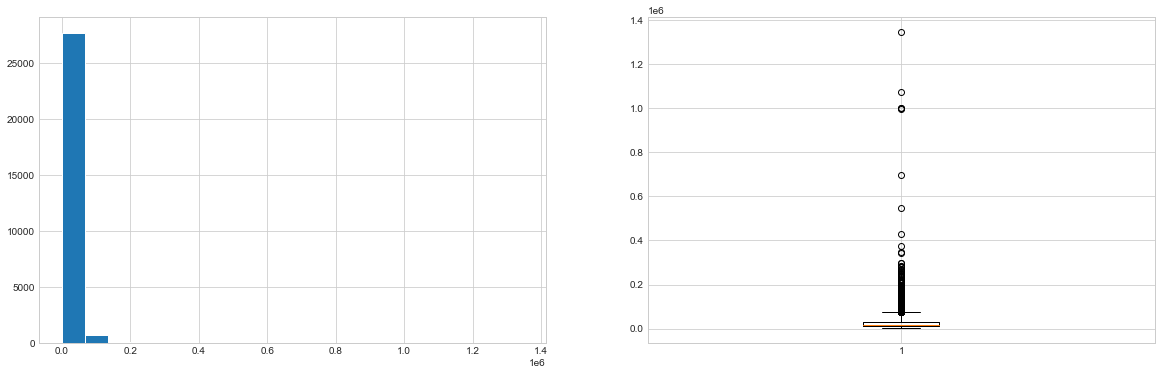

In [15]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Price, bins=20)

plt.subplot(122)
plt.boxplot(df.Price, whis=3)

plt.show()

In [16]:
df.Price.sort_values().head(20)

5847     490.0
5513     500.0
19565    500.0
17516    590.0
5291     600.0
5351     600.0
5296     699.0
23792    700.0
3375     700.0
5519     740.0
7812     750.0
5279     750.0
24546    750.0
20114    750.0
6460     790.0
2504     790.0
7835     790.0
5630     790.0
3149     799.0
3456     800.0
Name: Price, dtype: float64

In [18]:
df.Price.sort_values().tail(20)

19314     264900.0
1413      267810.0
1320      268900.0
1114      279000.0
1444      279063.0
710       283900.0
1595      284780.0
1076      299000.0
1451      299000.0
1305      344900.0
21927     349000.0
1317      375900.0
21606     430000.0
21553     549000.0
1212      696900.0
21919     998000.0
28184     999999.0
27804     999999.0
21778    1075900.0
21793    1346900.0
Name: Price, dtype: float64

In [19]:
df.Price.sort_values().tail(20).index[:20]

Int64Index([19314,  1413,  1320,  1114,  1444,   710,  1595,  1076,  1451,
             1305, 21927,  1317, 21606, 21553,  1212, 21919, 28184, 27804,
            21778, 21793],
           dtype='int64')

In [20]:
df.iloc[[19314,  1413,  1320,  1114,  1444,   710,  1595,  1076,  1451,
         1305, 21927,  1317, 21606, 21553,  1212, 21919, 28184, 27804,
         21778, 21793]]

,Make_Model,Location,Price,Body_Type,Type,Doors,Mileage,Gearbox,Fuel_Type,Seller,Seats,Engine_Size,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package
19314,Nissan Skyline,ES,264900.0,Coupe,Used,2.0,45000.0,Manual,Benzine,Dealer,4.0,2500.0,5.0,257.0,Rear,No info,Low_security,Standard,1530.0,No,Cloth,efficient,22.0,313.0,4.4,Standard
1413,Mercedes-Benz G 63 AMG,DE,267810.0,Off-Road/Pick-up,Demonstration,5.0,3003.0,Automatic,Benzine,Dealer,5.0,3982.0,9.0,330.0,4WD,Premium,Medium_security,Premium,2560.0,Yes,Part/Full Leather,unefficient,0.0,430.0,14.4,Premium
1320,Mercedes-Benz G 63 AMG,ES,268900.0,Off-Road/Pick-up,Pre-registered,5.0,1800.0,Automatic,Benzine,Dealer,5.0,3982.0,9.0,330.0,4WD,No info,Low_security,Standard,2560.0,No,Part/Full Leather,unefficient,0.0,430.0,0.0,Standard
1114,Mercedes-Benz SLS,DE,279000.0,Coupe,Used,2.0,30000.0,Automatic,Benzine,Dealer,2.0,6208.0,6.0,308.0,Front,Standard,Low_security,Standard,1395.0,No,Part/Full Leather,efficient,12.0,420.0,13.2,Standard
1444,Mercedes-Benz G 63 AMG,DE,279063.0,Off-Road/Pick-up,Demonstration,5.0,9900.0,Automatic,Benzine,Dealer,5.0,3982.0,9.0,341.0,4WD,Standard,High_security,Premium,2485.0,Yes,Part/Full Leather,unefficient,0.0,430.0,13.1,Standard
710,Mercedes-Benz AMG GT,AT,283900.0,Convertible,Used,3.0,3569.0,Automatic,Benzine,Dealer,2.0,3982.0,7.0,298.0,Rear,Standard,Medium_security,Standard,1735.0,Yes,Part/Full Leather,unefficient,0.0,409.0,13.0,Standard
1595,Mercedes-Benz G 63 AMG,DE,284780.0,Off-Road/Pick-up,Demonstration,5.0,9900.0,Automatic,Benzine,Dealer,5.0,3982.0,9.0,330.0,4WD,Premium,Medium_security,Premium,2560.0,Yes,Part/Full Leather,unefficient,0.0,430.0,13.8,Premium
1076,Mercedes-Benz GLE 63 AMG,DE,299000.0,Coupe,Demonstration,4.0,8000.0,Automatic,Benzine,Dealer,5.0,3982.0,7.0,282.0,4WD,Premium,Medium_security,Premium,2350.0,Yes,Part/Full Leather,unefficient,1.0,588.0,11.5,Premium
1451,Mercedes-Benz GLE 63 AMG,DE,299000.0,Off-Road/Pick-up,Demonstration,4.0,8000.0,Automatic,Benzine,Dealer,5.0,3982.0,9.0,282.0,4WD,Premium,Medium_security,Premium,2538.0,Yes,Part/Full Leather,unefficient,1.0,588.0,11.5,Premium
1305,Mercedes-Benz G 63 AMG,ES,344900.0,Off-Road/Pick-up,Pre-registered,5.0,100.0,Automatic,Benzine,Dealer,5.0,3982.0,9.0,330.0,4WD,No info,Low_security,Standard,2560.0,No,Part/Full Leather,unefficient,0.0,430.0,0.0,Standard


In [22]:
indexMercedes = df[(df["Make_Model"] == "Mercedes-Benz G 63 AMG") & (df['Price'] >= 400000)].index
indexVolvo = df[(df["Make_Model"] == "Volvo 240") & (df['Price'] >= 100000)].index
indexFord = df[(df["Make_Model"] == "Ford GT") & (df['Price'] >= 600000)].index
indexNissan = df[(df["Make_Model"] == "Nissan Skyline") & (df['Price'] >= 140000)].index

In [23]:
print(df.shape)
df.drop(indexMercedes, inplace=True)
df.drop(indexVolvo, inplace=True)
df.drop(indexFord, inplace=True)
df.drop(indexNissan, inplace=True)
print(df.shape)

(28630, 26)
(28619, 26)


In [24]:
df.Price.sort_values().tail(20)

438      239000.0
21312    240000.0
1393     248800.0
1502     249890.0
21961    250000.0
1587     259000.0
1397     259880.0
1413     267810.0
1320     268900.0
1114     279000.0
1444     279063.0
710      283900.0
1595     284780.0
1076     299000.0
1451     299000.0
1305     344900.0
21927    349000.0
1317     375900.0
21606    430000.0
21553    549000.0
Name: Price, dtype: float64

In [26]:
df.shape

(28619, 26)

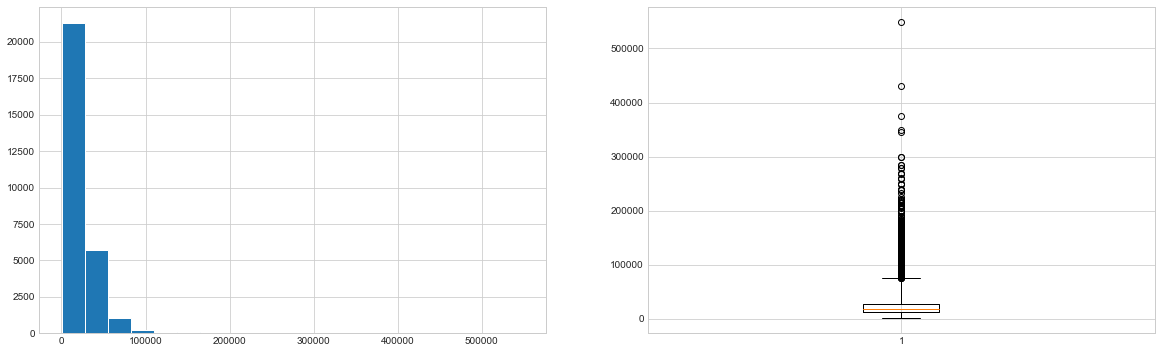

In [28]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Price, bins=20)

plt.subplot(122)
plt.boxplot(df.Price, whis=3)

plt.show()

### Mileage

In [29]:
first_looking("Mileage")

COLUMN NAME    :  Mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  14182
--------------------------------
10.0        586
1.0         170
50.0        133
5000.0      118
100.0       118
           ... 
43577.0       1
141589.0      1
59821.0       1
123500.0      1
230047.0      1
Name: Mileage, Length: 14182, dtype: int64


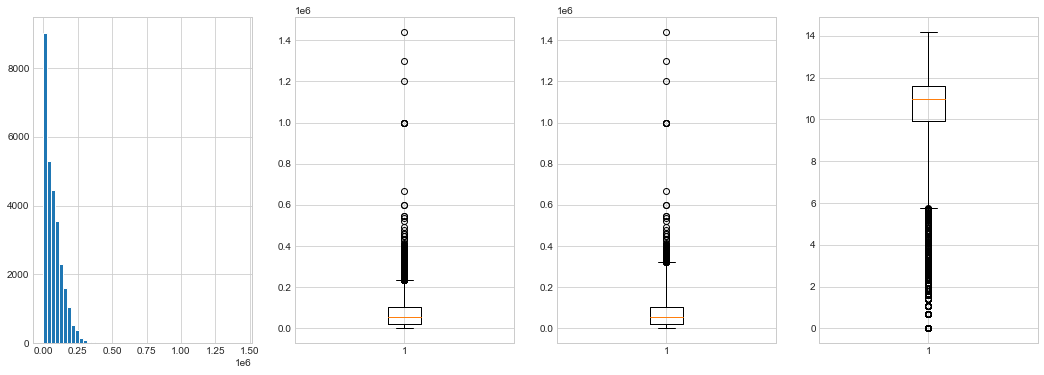

In [30]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.Mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.Mileage)

plt.subplot(143)
plt.boxplot(df.Mileage, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.Mileage), whis=2.5)

plt.show()  

In [31]:
df.Mileage.sort_values().head(20)

10982    0.0
22150    0.0
18382    0.0
18363    0.0
15950    0.0
11207    0.0
3710     0.0
3680     0.0
4450     0.0
11078    0.0
14753    0.0
4630     0.0
24302    0.0
16374    0.0
14796    0.0
4309     0.0
21831    0.0
10258    0.0
6437     0.0
10942    0.0
Name: Mileage, dtype: float64

In [32]:
df.Mileage.sort_values().tail(20)

28232     448914.0
282       457379.0
6494      461626.0
20092     477000.0
3456      494457.0
18340     523992.0
3212      536388.0
14374     546888.0
17907     547000.0
14360     600000.0
28463     600001.0
13153     667128.0
21344     999999.0
3397      999999.0
10009     999999.0
7684     1000000.0
22889    1000001.0
12169    1199900.0
17324    1300000.0
18873    1440000.0
Name: Mileage, dtype: float64

In [33]:
df[df["Mileage"] > 1000000][["Make_Model", "Type", "Mileage", "Age"]]

,Make_Model,Type,Mileage,Age
12169,SEAT Ibiza,Used,1199900.0,4.0
17324,Toyota Celica,Used,1300000.0,36.0
18873,Nissan Micra,Used,1440000.0,3.0
22889,Ford Fiesta,Used,1000001.0,4.0


In [34]:
drop_mileage_index = df[df["Mileage"] > 1000000][["Make_Model", "Type", "Mileage", "Age"]].index
drop_mileage_index

Int64Index([12169, 17324, 18873, 22889], dtype='int64')

In [35]:
print(df.shape)
df.drop(drop_mileage_index, inplace=True)
print(df.shape)

(28619, 26)
(28615, 26)


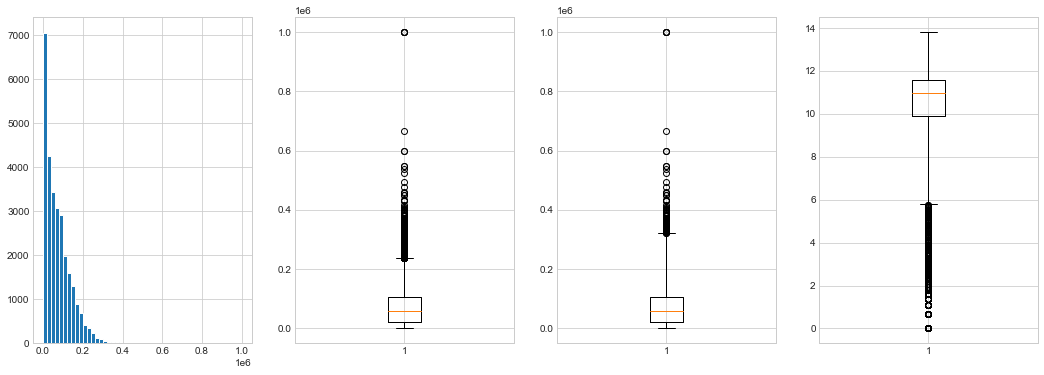

In [37]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.Mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.Mileage)

plt.subplot(143)
plt.boxplot(df.Mileage, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.Mileage), whis=2.5)

plt.show()

In [ ]:
# mileage is a variable with a wide range of values. 
# However, these extreme values above CANNOT be considered as genuine outliers since they might be a part of real world scenerio.
# So, let's keep these extreme values as they are.

### Safety_Security

In [19]:
df0.Safety_Security.value_counts() 

Medium_security    19178
Low_security        8657
High_security        795
Name: Safety_Security, dtype: int64

In [20]:
df.Colour.value_counts()

Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
Other     1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: Colour, dtype: int64

### Seats

In [38]:
first_looking("Seats")

COLUMN NAME    :  Seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
5.0     20713
4.0      5964
2.0      1263
7.0       542
8.0        44
9.0        35
3.0        26
6.0        12
0.0         9
1.0         5
17.0        2
Name: Seats, dtype: int64


In [40]:
print(df.shape)
df.drop("Seats", axis=1, inplace=True)
print(df.shape)

(28615, 26)
(28615, 25)


## Engine_Size

In [26]:
first_looking("Engine_Size")

0        1400.0
1        1000.0
2        2000.0
3        2000.0
4        2000.0
          ...  
28625    2000.0
28626    2000.0
28627    1600.0
28628    2000.0
28629    3000.0
Name: Engine_Size_cc, Length: 28630, dtype: float64

In [41]:
df["Engine_Size"].describe()

count    28615.000000
mean      1745.320252
std       1045.056471
min          0.000000
25%       1300.000000
50%       1598.000000
75%       1984.000000
max      99900.000000
Name: Engine_Size, dtype: float64

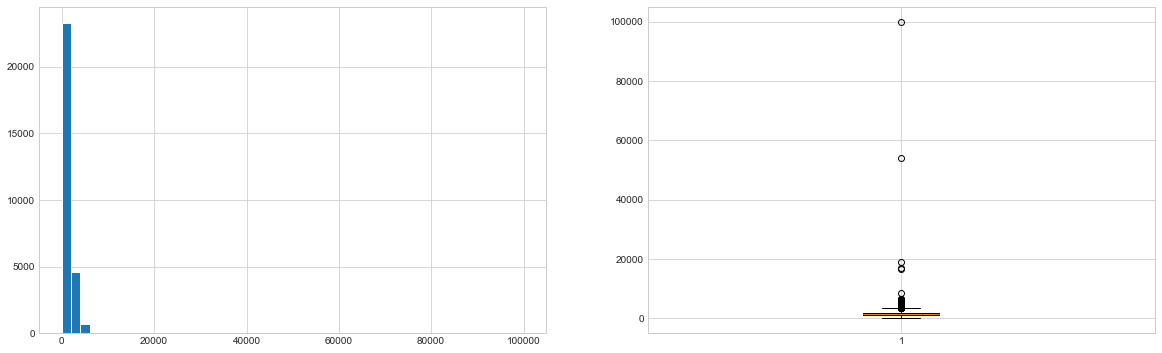

In [42]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["Engine_Size"], bins=50)

plt.subplot(122)
plt.boxplot(df["Engine_Size"], whis=2.5)

plt.show()

In [43]:
df.sort_values(by=["Engine_Size"], ascending=False)["Engine_Size"].head(20)

16556    99900.0
21330    54009.0
716      19194.0
5580     16998.0
16105    16597.0
21667     8660.0
21797     6653.0
21345     6400.0
21653     6400.0
21393     6387.0
693       6300.0
699       6300.0
21481     6294.0
21333     6276.0
703       6209.0
2072      6208.0
1214      6208.0
1956      6208.0
679       6208.0
853       6208.0
Name: Engine_Size, dtype: float64

In [44]:
df.sort_values(by=["Engine_Size"], ascending=True)["Engine_Size"].head(20)

20571    0.0
20551    0.0
20552    0.0
14212    0.0
15141    0.0
14235    0.0
18964    0.0
14248    0.0
14277    0.0
14284    0.0
14196    0.0
14300    0.0
13659    0.0
6824     0.0
6811     0.0
6810     0.0
11619    0.0
6803     0.0
14316    0.0
6795     0.0
Name: Engine_Size, dtype: float64

In [45]:
df["Engine_Size"].value_counts().sort_index(ascending=True)

0.0         330
1.0         111
2.0          12
4.0           2
5.0           3
20.0          1
200.0         1
289.0         1
300.0         1
332.0         1
498.0         1
499.0         5
500.0         2
549.0         1
600.0         1
650.0         2
652.0         2
698.0         1
750.0         2
767.0         6
839.0         2
843.0        10
847.0         1
850.0         5
875.0       113
898.0       432
899.0        20
900.0        53
903.0         4
964.0         3
973.0         2
982.0         1
987.0         2
988.0         1
996.0         2
997.0         1
998.0       952
999.0      2144
1000.0       99
1084.0       37
1086.0       15
1089.0        1
1100.0       13
1108.0       10
1116.0        2
1119.0        1
1120.0        4
1122.0        1
1124.0       10
1149.0      159
1150.0        2
1158.0        4
1194.0        2
1196.0        1
1197.0      384
1198.0      153
1199.0      931
1200.0      162
1221.0        2
1229.0       64
1235.0        1
1240.0       20
1241.0  

In [46]:
df[df["Engine_Size"] <= 500][["Make_Model", "Age", "Body_Type", "Gearbox", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type"]]\
                            .sort_values(by=["Engine_Size"], ascending=True)

,Make_Model,Age,Body_Type,Gearbox,Drivetrain,Gears,Engine_Size,Fuel_Type
11620,Fiat 500e,1.0,Sedan,Automatic,Front,1.0,0.0,Electric
11640,Fiat 500e,0.0,Sedan,Automatic,Front,1.0,0.0,Electric
11632,Fiat 500e,1.0,Sedan,Automatic,Front,1.0,0.0,Electric
18964,Nissan Leaf,1.0,Compact,Automatic,Front,1.0,0.0,Electric
11619,Fiat 500e,1.0,Sedan,Automatic,Front,1.0,0.0,Electric
11595,Fiat 500e,0.0,Sedan,Automatic,Front,1.0,0.0,Electric
11578,Fiat 500e,1.0,Sedan,Automatic,Front,1.0,0.0,Electric
11577,Fiat 500e,0.0,Sedan,Automatic,Front,1.0,0.0,Electric
11558,Fiat 500e,0.0,Sedan,Automatic,Front,1.0,0.0,Electric
11544,Fiat 500e,0.0,Sedan,Automatic,Front,1.0,0.0,Electric


In [47]:
df["Engine_Size"].value_counts().sort_index(ascending=False)

99900.0       1
54009.0       1
19194.0       1
16998.0       1
16597.0       1
8660.0        1
6653.0        1
6400.0        2
6387.0        1
6300.0        2
6294.0        1
6276.0        1
6209.0        1
6208.0       12
6000.0        1
5987.0        2
5981.0        1
5980.0        4
5950.0        1
5812.0        1
5800.0        2
5786.0        1
5768.0        1
5766.0        1
5700.0        1
5689.0        2
5686.0        1
5666.0        1
5663.0        1
5600.0        4
5513.0        5
5461.0       51
5439.0        9
5409.0        2
5400.0        4
5300.0        1
5200.0       12
5162.0        4
5083.0        1
5038.0      303
5032.0        2
5031.0        1
5000.0       21
4996.0        2
4995.0        1
4973.0        7
4966.0       19
4952.0        3
4951.0       89
4949.0        7
4948.0        1
4942.0        2
4886.0        1
4885.0        1
4800.0        1
4742.0        2
4736.0        1
4735.0        2
4728.0        2
4700.0       10
4664.0        1
4663.0       31
4660.0  

In [48]:
df[df["Engine_Size"] > 4000][["Make_Model", "Age", "Body_Type", "Gearbox", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type"]]\
                            .sort_values(by=["Engine_Size"], ascending=False)

,Make_Model,Age,Body_Type,Gearbox,Drivetrain,Gears,Engine_Size,Fuel_Type
16556,Dacia Sandero,3.0,Sedan,Manual,Front,5.0,99900.0,Benzine
21330,Ford Mustang,14.0,Convertible,Manual,Rear,6.0,54009.0,Benzine
716,Mercedes-Benz SL 320,21.0,Convertible,Automatic,Rear,5.0,19194.0,Benzine
5580,Renault Megane,7.0,Coupe,Manual,Front,6.0,16998.0,Benzine
16105,Dacia Dokker,0.0,Station wagon,Manual,Front,5.0,16597.0,Liquid/Natural Gas
21667,Ford Mustang,53.0,Coupe,Semi-automatic,Rear,3.0,8660.0,Benzine
21797,Ford Mustang,57.0,Coupe,Manual,Rear,6.0,6653.0,Benzine
21345,Ford Thunderbird,59.0,Convertible,Automatic,Rear,3.0,6400.0,Benzine
21653,Ford Mustang,54.0,Coupe,Manual,Rear,4.0,6400.0,Benzine
21393,Ford,60.0,Convertible,Automatic,Rear,3.0,6387.0,Benzine


In [49]:
# df.loc[df.make_model == "Ford Thunderbird"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Fairlane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Sandero"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
df.loc[df.Make_Model == "Mercedes-Benz SL 320"][["Make_Model", "Age", "Body_Type", "Gearbox", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type"]]
# df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Dokker"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

,Make_Model,Age,Body_Type,Gearbox,Drivetrain,Gears,Engine_Size,Fuel_Type
716,Mercedes-Benz SL 320,21.0,Convertible,Automatic,Rear,5.0,19194.0,Benzine
733,Mercedes-Benz SL 320,29.0,Convertible,Automatic,Rear,5.0,3200.0,Benzine
823,Mercedes-Benz SL 320,29.0,Coupe,Automatic,Rear,5.0,3199.0,Benzine


In [50]:
df[(df["Engine_Size"] >= 2) & (df["Engine_Size"] <= 500)][["Make_Model", "Age", "Body_Type", "Gearbox", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type"]]\
                            .sort_values(by=["Engine_Size"], ascending=True)

,Make_Model,Age,Body_Type,Gearbox,Drivetrain,Gears,Engine_Size,Fuel_Type
28528,Volvo S90,1.0,Sedan,Automatic,4WD,8.0,2.0,Electric
28340,Volvo S90,1.0,Sedan,Automatic,4WD,8.0,2.0,Electric
21948,Ford Kuga,1.0,Off-Road/Pick-up,Automatic,4WD,6.0,2.0,Electric
22312,Ford Kuga,4.0,Off-Road/Pick-up,Manual,4WD,6.0,2.0,Diesel
26827,Volvo XC60,0.0,Off-Road/Pick-up,Automatic,4WD,8.0,2.0,Diesel
26950,Volvo XC90,1.0,Off-Road/Pick-up,Automatic,4WD,8.0,2.0,Diesel
27216,Volvo XC60,0.0,Off-Road/Pick-up,Automatic,4WD,8.0,2.0,Diesel
26877,Volvo XC60,0.0,Off-Road/Pick-up,Automatic,4WD,8.0,2.0,Diesel
27336,Volvo XC90,1.0,Off-Road/Pick-up,Automatic,4WD,8.0,2.0,Diesel
2140,Mercedes-Benz E 220,12.0,Sedan,Manual,Rear,9.0,2.0,Diesel


In [51]:
outlier_eng_size = df["Engine_Size"].isin([4, 5, 20, 200, 289, 300, 332, 8660, 99900, 54009, 19194, 16998, 16597])
df[outlier_eng_size][["Make_Model", "Age", "Body_Type", "Gearbox", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type", "Empty_Weight"]]

,Make_Model,Age,Body_Type,Gearbox,Drivetrain,Gears,Engine_Size,Fuel_Type,Empty_Weight
88,Mercedes-Benz E 300,36.0,Compact,Automatic,Rear,9.0,300.0,Liquid/Natural Gas,1550.0
716,Mercedes-Benz SL 320,21.0,Convertible,Automatic,Rear,5.0,19194.0,Benzine,1780.0
3327,Opel Calibra,30.0,Coupe,Manual,Front,5.0,200.0,Benzine,1245.0
5243,Renault Megane,18.0,Convertible,Automatic,Rear,6.0,20.0,Benzine,1395.0
5580,Renault Megane,7.0,Coupe,Manual,Front,6.0,16998.0,Benzine,1454.0
13253,SEAT Leon,1.0,Sedan,Automatic,Front,6.0,4.0,Benzine,1239.0
15606,Dacia Duster,1.0,Off-Road/Pick-up,Manual,4WD,6.0,332.0,Benzine,1320.0
16105,Dacia Dokker,0.0,Station wagon,Manual,Front,5.0,16597.0,Liquid/Natural Gas,1280.0
16556,Dacia Sandero,3.0,Sedan,Manual,Front,5.0,99900.0,Benzine,1115.0
17068,Toyota MR 2,30.0,Convertible,Manual,4WD,1.0,4.0,Benzine,1050.0


In [52]:
df.loc[outlier_eng_size, "Engine_Size"] = np.nan

In [53]:
df["Engine_Size"].isnull().sum()

16

In [54]:
fill(df, "Make_Model", "Body_Type", "Engine_Size", "mode")

Number of NaN :  0
------------------
1598.0    2255
999.0     2144
1969.0    1967
1461.0    1145
1998.0    1058
998.0      952
1199.0     931
1498.0     786
1997.0     676
1968.0     631
1984.0     584
1332.0     531
1798.0     487
1560.0     479
898.0      433
1242.0     421
1499.0     413
1197.0     384
1991.0     357
1995.0     357
1368.0     355
1248.0     332
0.0        330
5038.0     309
2435.0     309
1600.0     296
2143.0     251
1364.0     230
1500.0     213
2000.0     209
1950.0     204
3982.0     204
1956.0     203
1591.0     203
3498.0     180
1395.0     176
1987.0     164
1200.0     162
1796.0     160
1149.0     159
3696.0     158
2400.0     156
1497.0     154
1198.0     153
1490.0     153
1398.0     147
2996.0     147
1999.0     147
1794.0     143
1496.0     138
1618.0     128
1482.0     127
1582.0     127
1595.0     120
2925.0     119
875.0      113
1587.0     113
1.0        111
1580.0     109
1596.0     106
2987.0     106
1400.0     105
1333.0     105
2261.0     101
10

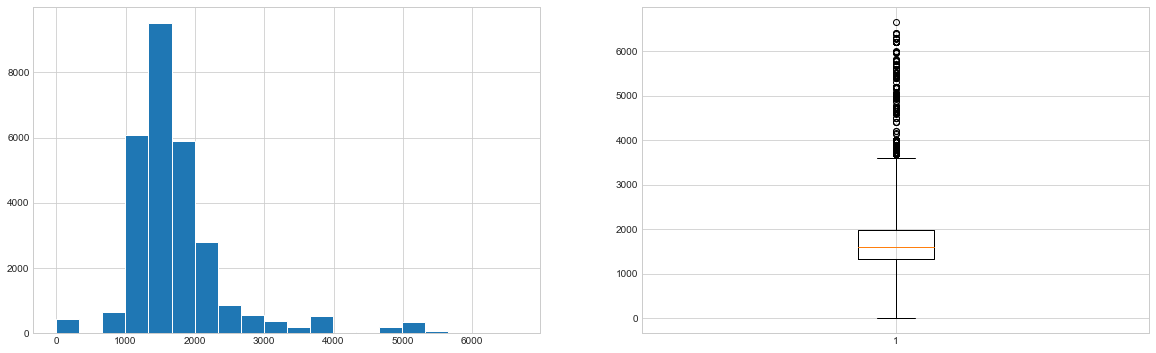

In [55]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["Engine_Size"], bins=20)

plt.subplot(122)
plt.boxplot(df["Engine_Size"], whis=2.5)

plt.show()

# Energy_Efficiency_Class

In [28]:
df["Energy_Efficiency_Class"].replace({"A+++": "High Efficiency",
                                       "A++": "High Efficiency",
                                       "A+": "High Efficiency",
                                       "A": "Medium Efficiency",
                                       "B": "Medium Efficiency",
                                       "C": "Medium Efficiency",
                                       "D": "Low Efficiency",
                                       "E": "Low Efficiency",
                                       "F": "Low Efficiency",
                                       "G": "Low Efficiency"
                                      }, inplace = True)

In [29]:
df.Energy_Efficiency_Class.value_counts()

Medium Efficiency    19053
Low Efficiency        4846
High Efficiency       4731
Name: Energy_Efficiency_Class, dtype: int64

### Gears

In [56]:
first_looking("Gears")

COLUMN NAME    :  Gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
6.0     12244
5.0      7794
8.0      2737
7.0      2631
1.0      1348
9.0      1143
4.0       380
10.0      244
3.0        60
0.0        31
2.0         3
Name: Gears, dtype: int64


In [57]:
df.Gears.describe()

count    28615.000000
mean         5.889499
std          1.587795
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: Gears, dtype: float64

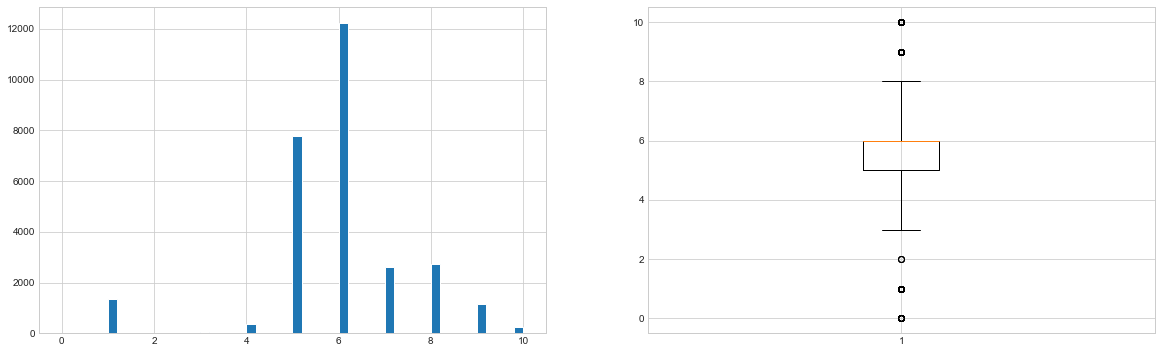

In [58]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [59]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(20)

21241    10.0
21690    10.0
21707    10.0
21706    10.0
21705    10.0
21704    10.0
21702    10.0
21701    10.0
21700    10.0
21696    10.0
21695    10.0
21691    10.0
21689    10.0
21662    10.0
21685    10.0
21681    10.0
21680    10.0
21679    10.0
21676    10.0
21673    10.0
Name: Gears, dtype: float64

In [60]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(20)

12801    0.0
18583    0.0
17945    0.0
18654    0.0
1396     0.0
22783    0.0
17930    0.0
18657    0.0
23951    0.0
9770     0.0
18598    0.0
5122     0.0
19520    0.0
19477    0.0
1177     0.0
19504    0.0
28557    0.0
28556    0.0
18150    0.0
19289    0.0
Name: Gears, dtype: float64

In [33]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

21557    10.0
21873    10.0
21871    10.0
21869    10.0
21865    10.0
21863    10.0
21860    10.0
21613    10.0
21616    10.0
21618    10.0
Name: Gears, dtype: float64

In [61]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

12801    0.0
18583    0.0
17945    0.0
18654    0.0
1396     0.0
22783    0.0
17930    0.0
18657    0.0
23951    0.0
9770     0.0
Name: Gears, dtype: float64

In [63]:
df[(df.Gears < 5) | (df.Gears > 8)][["Make_Model", "Body_Type", "Gearbox", "Gears"]]

,Make_Model,Body_Type,Gearbox,Gears
1,Mercedes-Benz EQE 350,Compact,Automatic,9.0
9,Mercedes-Benz A 200,Compact,Automatic,1.0
24,Mercedes-Benz GLC 220,Compact,Automatic,9.0
33,Mercedes-Benz E 220,Compact,Manual,9.0
73,Mercedes-Benz V 220,Compact,Manual,9.0
...,...,...,...,...
28447,Volvo S90,Sedan,Automatic,4.0
28504,Volvo 240,Sedan,Automatic,1.0
28518,Volvo S60,Sedan,Automatic,4.0
28556,Volvo S90,Sedan,Automatic,0.0


In [65]:
df["Gears"].replace([0,1, 2, 3, 4, 9, 10], np.nan, inplace=True)

In [66]:
df.Gears.isnull().sum()

3209

In [67]:
fill(df, "Make_Model", "Body_Type", "Gears", "mode")

Number of NaN :  0
------------------
6.0    14250
5.0     8361
7.0     3187
8.0     2817
Name: Gears, dtype: int64


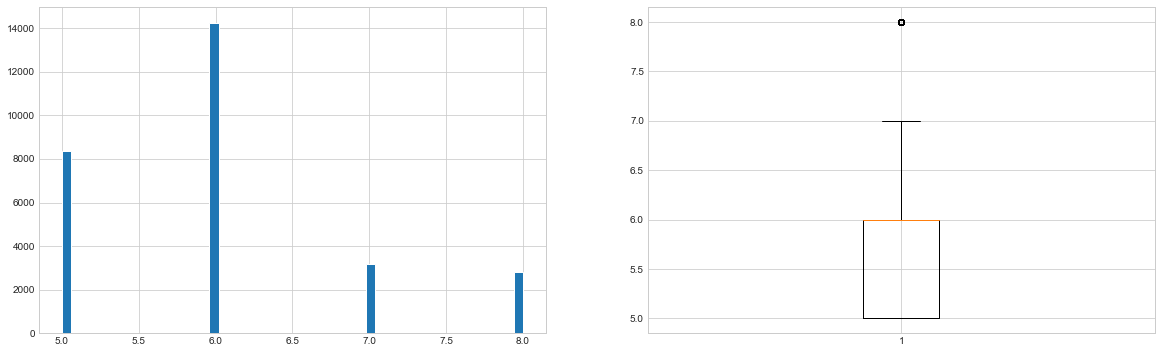

In [68]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

### Empty_Weight

In [69]:
first_looking("Empty_Weight")

COLUMN NAME    :  Empty_Weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1218
--------------------------------
1320.0     724
1280.0     518
1055.0     474
1395.0     461
1165.0     392
1115.0     357
1090.0     263
1315.0     259
1659.0     252
1370.0     242
1423.0     239
1331.0     220
1239.0     215
1310.0     201
1245.0     190
1135.0     189
1485.0     188
1430.0     185
1597.0     184
1335.0     182
1550.0     181
1425.0     180
1893.0     177
1275.0     176
1505.0     176
2169.0     175
1295.0     174
1255.0     174
1680.0     167
1050.0     157
1355.0     155
1735.0     154
1233.0     146
905.0      144
1557.0     137
2075.0     137
1375.0     136
1615.0     134
1063.0     131
1235.0     126
1157.0     126
1701.0     120
1040.0     119
1500.0     118
1575.0     113
1472.0     112
1492.0     112
1350.0     110
1065.0     109
950.0      109
1812.0     108
1420.0     107
1480.0     107
2100.0     106
1076.0     105
1390.0     

In [70]:
df["Empty_Weight"].describe()

count    28615.000000
mean      1419.352612
std        324.983024
min         75.000000
25%       1213.500000
50%       1371.000000
75%       1595.000000
max      15590.000000
Name: Empty_Weight, dtype: float64

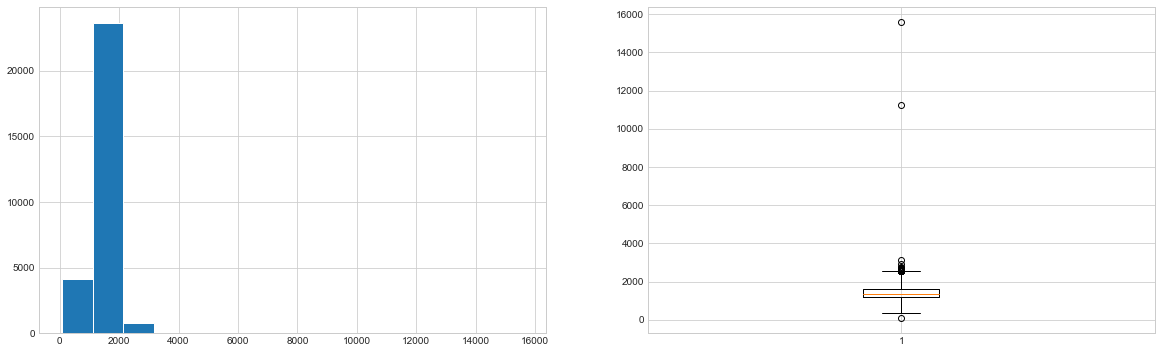

In [71]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Empty_Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Empty_Weight, whis=2.5)

plt.show()

In [72]:
df["Empty_Weight"].sort_values().head(10)

13995     75.0
6166     347.0
6205     375.0
4886     473.0
5430     473.0
4838     473.0
4943     473.0
5786     474.0
4188     525.0
5140     562.0
Name: Empty_Weight, dtype: float64

In [73]:
df.sort_values(by=["Empty_Weight"], ascending=False)["Empty_Weight"].head(10)

6869     15590.0
21142    11246.0
1295      3150.0
20037     2900.0
5414      2750.0
17891     2725.0
2371      2712.0
1199      2690.0
2199      2680.0
1628      2680.0
Name: Empty_Weight, dtype: float64

In [74]:
df["Empty_Weight"].replace([75, 15590.0,11246.0], np.nan, inplace = True)

In [75]:
df["Empty_Weight"].isnull().sum()

3

In [76]:
fill(df, "Make_Model", "Body_Type", "Empty_Weight", "mode")

Number of NaN :  0
------------------
1320.0    724
1280.0    518
1055.0    474
1395.0    461
1165.0    392
1115.0    357
1090.0    263
1315.0    259
1659.0    252
1370.0    242
1423.0    239
1331.0    220
1239.0    215
1310.0    201
1245.0    190
1135.0    189
1485.0    188
1430.0    185
1597.0    184
1335.0    182
1550.0    181
1425.0    180
1893.0    177
1275.0    176
1505.0    176
2169.0    175
1295.0    174
1255.0    174
1680.0    167
1050.0    157
1355.0    155
1735.0    154
1233.0    146
905.0     144
1557.0    137
2075.0    137
1375.0    136
1615.0    134
1063.0    132
1235.0    126
1157.0    126
1701.0    120
1040.0    119
1500.0    118
1575.0    113
1472.0    112
1492.0    112
1350.0    110
1065.0    109
950.0     109
1812.0    108
1420.0    107
1480.0    107
2100.0    106
1076.0    105
1390.0    105
980.0     104
1322.0    102
2009.0    102
1387.0    101
1365.0    101
1733.0    101
1308.0    101
1388.0     99
1265.0     98
1483.0     98
1180.0     97
1297.0     95
1700.0    

In [77]:
df["Empty_Weight"].isnull().sum()

0

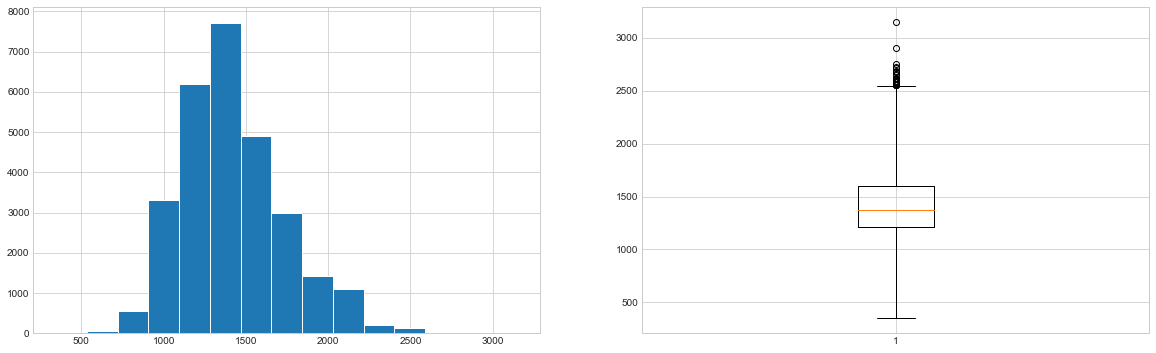

In [78]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Empty_Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Empty_Weight, whis=2.5)

plt.show()

# Age

In [92]:
first_looking("Age")

COLUMN NAME    :  Age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  83
--------------------------------
 3.0      3666
 4.0      3488
 0.0      3087
 1.0      2869
 2.0      2473
 5.0      2426
 6.0      1486
 7.0      1237
 8.0       936
 9.0       703
 10.0      655
 11.0      642
 12.0      559
 15.0      492
 14.0      441
 13.0      424
 16.0      395
 17.0      287
 18.0      247
 19.0      211
 21.0      191
 20.0      187
 22.0      158
 23.0      143
 24.0       91
 25.0       81
 28.0       80
 27.0       78
 26.0       71
 30.0       60
 31.0       60
 29.0       55
 32.0       54
 56.0       41
 55.0       34
 34.0       33
 57.0       32
 49.0       29
 50.0       29
 54.0       27
 35.0       26
 44.0       23
 36.0       21
 33.0       20
 52.0       19
 37.0       18
 51.0       18
 43.0       17
 53.0       17
 39.0       16
 47.0       14
 45.0       13
 58.0       11
 46.0       11
 38.0       10
 40.0        9
 48.0  

In [93]:
df["Age"].describe()

count    28615.000000
mean         6.830893
std          8.749947
min       -180.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        122.000000
Name: Age, dtype: float64

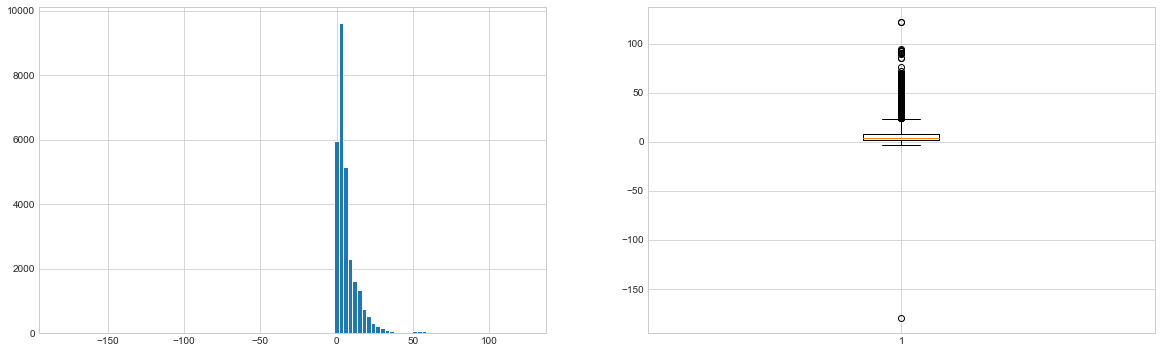

In [94]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["Age"], bins=100)

plt.subplot(122)
plt.boxplot(df["Age"], whis=2.5)

plt.show()

In [95]:
df.sort_values(by=["Age"], ascending=True)["Age"].head(20)

7011    -180.0
9764      -3.0
19213     -1.0
22614      0.0
24637      0.0
9653       0.0
2592       0.0
2593       0.0
24642      0.0
14635      0.0
14634      0.0
20565      0.0
24643      0.0
24645      0.0
14627      0.0
24649      0.0
20567      0.0
24650      0.0
2606       0.0
2607       0.0
Name: Age, dtype: float64

In [96]:
df.loc[df["Age"] > 20][["Make_Model", "Age", "Body_Type", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type"]]\
                                 .sort_values(by=["Age"], ascending=False)

,Make_Model,Age,Body_Type,Drivetrain,Gears,Engine_Size,Fuel_Type
22058,Ford Bronco,122.0,Off-Road/Pick-up,4WD,8.0,2000.0,Benzine
24783,Hyundai IONIQ,122.0,Sedan,Front,6.0,1580.0,Benzine
21372,Ford,94.0,Convertible,Rear,5.0,3600.0,Benzine
21200,Ford M,93.0,Convertible,Front,6.0,2043.0,Benzine
8043,Peugeot,92.0,Coupe,Rear,6.0,1122.0,Benzine
21317,Ford,92.0,Convertible,Rear,5.0,5700.0,Benzine
21338,Ford,90.0,Convertible,Front,5.0,3600.0,Benzine
21461,Ford,90.0,Convertible,Rear,5.0,3600.0,Benzine
21386,Ford,90.0,Convertible,Rear,5.0,5300.0,Benzine
10009,Fiat,89.0,Convertible,Rear,5.0,2518.0,Benzine


In [97]:
# Get the count of each value

car_counts = df['Age'].value_counts()
car_counts

 3.0      3666
 4.0      3488
 0.0      3087
 1.0      2869
 2.0      2473
 5.0      2426
 6.0      1486
 7.0      1237
 8.0       936
 9.0       703
 10.0      655
 11.0      642
 12.0      559
 15.0      492
 14.0      441
 13.0      424
 16.0      395
 17.0      287
 18.0      247
 19.0      211
 21.0      191
 20.0      187
 22.0      158
 23.0      143
 24.0       91
 25.0       81
 28.0       80
 27.0       78
 26.0       71
 30.0       60
 31.0       60
 29.0       55
 32.0       54
 56.0       41
 55.0       34
 34.0       33
 57.0       32
 49.0       29
 50.0       29
 54.0       27
 35.0       26
 44.0       23
 36.0       21
 33.0       20
 52.0       19
 37.0       18
 51.0       18
 43.0       17
 53.0       17
 39.0       16
 47.0       14
 45.0       13
 58.0       11
 46.0       11
 38.0       10
 40.0        9
 48.0        9
 59.0        9
 41.0        9
 60.0        8
 61.0        7
 67.0        6
 42.0        6
 68.0        4
 65.0        4
 64.0        4
 62.0     

In [98]:
drop_old_cars_index = df.loc[(df["Age"] > 20) | (df["Age"] < 0)].index
drop_old_cars_index

Int64Index([   88,   282,   402,   442,   443,   452,   487,   516,   529,
              538,
            ...
            28463, 28496, 28504, 28511, 28560, 28564, 28573, 28602, 28614,
            28615],
           dtype='int64', length=1704)

In [99]:
print(df.shape)
df.drop(drop_old_cars_index, axis=0, inplace=True)
print(df.shape)

(28615, 25)
(26911, 25)


In [100]:
# Get the count of each value
car_age_counts = df['Age'].value_counts()
car_age_counts

3.0     3666
4.0     3488
0.0     3087
1.0     2869
2.0     2473
5.0     2426
6.0     1486
7.0     1237
8.0      936
9.0      703
10.0     655
11.0     642
12.0     559
15.0     492
14.0     441
13.0     424
16.0     395
17.0     287
18.0     247
19.0     211
20.0     187
Name: Age, dtype: int64

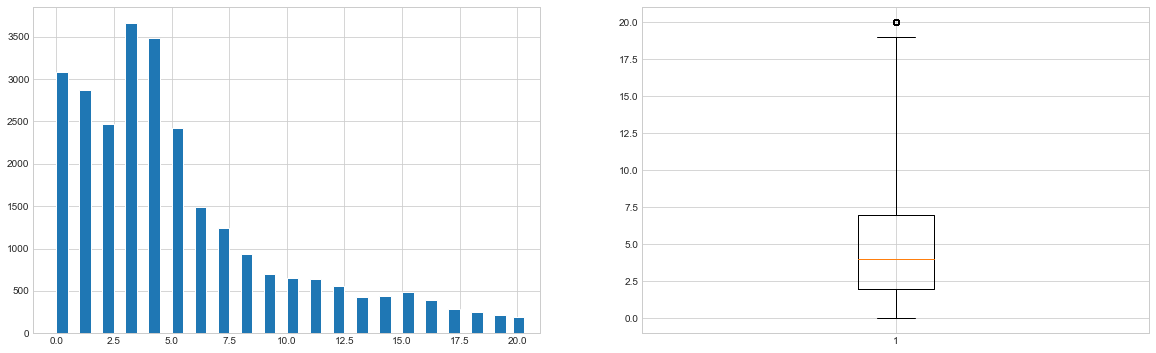

In [102]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["Age"], bins=100, width=0.5)

plt.subplot(122)
plt.boxplot(df["Age"], whis=2.5)

plt.show()

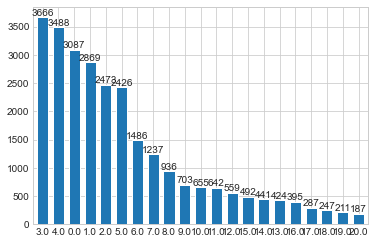

In [103]:
fig, ax = plt.subplots()

df["Age"].value_counts(dropna=False).plot.bar(width=0.7)

plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

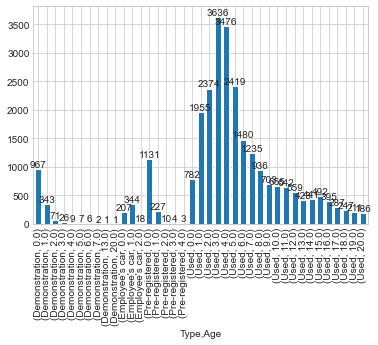

In [104]:
fig, ax = plt.subplots()

df.groupby(["Type", "Age"])["Age"].count().plot.bar(width=0.7)

for container in ax.containers:
    ax.bar_label(container);

### power_kW

In [105]:
first_looking("power_kW")

COLUMN NAME    :  power_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  321
--------------------------------
110.0    1987
96.0     1353
88.0     1182
81.0     1156
66.0     1087
85.0     1000
103.0     987
74.0      891
140.0     753
51.0      703
70.0      685
100.0     672
55.0      507
92.0      464
147.0     428
125.0     397
120.0     366
80.0      340
132.0     330
90.0      311
135.0     311
118.0     247
130.0     245
173.0     241
84.0      228
221.0     221
115.0     216
77.0      213
67.0      211
82.0      206
206.0     205
145.0     204
150.0     204
63.0      187
53.0      184
97.0      180
104.0     163
288.0     155
59.0      146
73.0      137
60.0      132
180.0     129
202.0     129
68.0      129
331.0     124
44.0      123
143.0     123
87.0      123
107.0     122
121.0     122
190.0     119
184.0     118
54.0      117
241.0     117
75.0      113
165.0     112
52.0      111
228.0     105
310.0      99
169.0      99
1

In [106]:
df["power_kW"].describe()

count    26911.000000
mean       119.447661
std         68.450016
min          1.000000
25%         80.000000
50%        100.000000
75%        135.000000
max        883.000000
Name: power_kW, dtype: float64

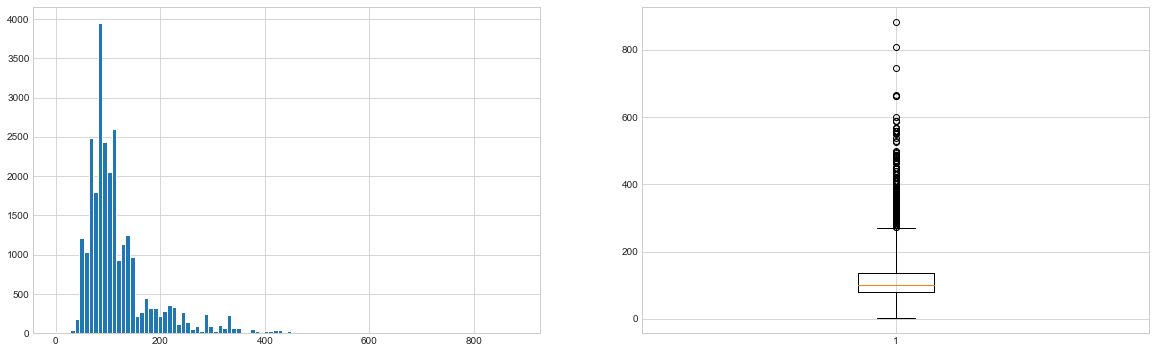

In [107]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kW"], bins=100)

plt.subplot(122)
plt.boxplot(df["power_kW"], whis=2.5)

plt.show()

In [108]:
df.sort_values(by=["power_kW"], ascending=False)["power_kW"].head(20)

19469    883.0
19499    810.0
19288    746.0
19473    665.0
19584    664.0
21772    662.0
19534    600.0
1076     588.0
19483    588.0
1451     588.0
21569    567.0
21541    567.0
21662    567.0
21916    559.0
21818    559.0
21801    559.0
21794    559.0
21780    559.0
21821    559.0
21777    559.0
Name: power_kW, dtype: float64

In [109]:
df["power_kW"].sort_values(ascending=True).head(20)

5430      1.0
5173      1.0
22101     3.0
6166      4.0
5936      4.0
5748      4.0
5786      4.0
6205      4.0
24429     6.0
5545      7.0
5919      8.0
5952      8.0
5816      8.0
5140      9.0
4838     12.0
5836     12.0
4886     13.0
9513     17.0
16416    18.0
16471    18.0
Name: power_kW, dtype: float64

In [110]:
df.groupby(["Make_Model", "Body_Type", "Fuel_Type"]).power_kW.describe()

count  \
Make_Model               Body_Type        Fuel_Type                   
Dacia                    Compact          Benzine               3.0   
                         Station wagon    Benzine               1.0   
Dacia Break              Station wagon    Benzine               1.0   
Dacia Dokker             Compact          Diesel                1.0   
                         Off-Road/Pick-up Benzine               1.0   
                                          Liquid/Natural Gas    1.0   
                         Sedan            Diesel                1.0   
                         Station wagon    Benzine              17.0   
                                          Diesel               29.0   
                                          Liquid/Natural Gas    6.0   
Dacia Duster             Convertible      Liquid/Natural Gas    1.0   
                         Off-Road/Pick-up Benzine             129.0   
                                          Diesel              165.0   
                                          Liquid/Natural Gas   27.0   
                         Sedan            Benzine               1.0   
                                          Diesel                2.0   
                                          Liquid/Natural Gas    1.0   
                         Station wagon    Benzine               5.0   
                                          Diesel               17.0   
                                          Liquid/Natural Gas    1.0   
Dacia Jogger             Off-Road/Pick-up Liquid/Natural Gas    1.0   
                         Sedan            Benzine               1.0   
                         Station wagon    Benzine              79.0   
                                          Liquid/Natural Gas    5.0   
Dacia Lodgy              Compact          Diesel                1.0   
                         Sedan            Diesel                1.0   
                                          Liquid/Natural Gas    1.0   
                         Station wagon    Benzine              34.0   
                                          Diesel               33.0   
                                          Liquid/Natural Gas    2.0   
Dacia Logan              Compact          Benzine               8.0   
                                          Diesel                4.0   
                                          Liquid/Natural Gas    1.0   
                         Sedan            Benzine              29.0   
                                          Diesel                3.0   
                                          Liquid/Natural Gas    3.0   
                         Station wagon    Benzine             104.0   
                                          Diesel               35.0   
                                          Liquid/Natural Gas   12.0   
Dacia Sandero            Compact          Benzine             252.0   
                                          Diesel               77.0   
                                          Liquid/Natural Gas   11.0   
                         Convertible      Benzine               1.0   
                         Coupe            Benzine               2.0   
                         Off-Road/Pick-up Benzine              41.0   
                                          Diesel                2.0   
                                          Liquid/Natural Gas    7.0   
                         Sedan            Benzine             256.0   
                                          Diesel               59.0   
                                          Liquid/Natural Gas   18.0   
                         Station wagon    Benzine               2.0   
                                          Diesel                2.0   
Dacia Spring             Compact          Electric             27.0   
                         Off-Road/Pick-up Electric              3.0   
                         Sedan            Electric              9.0   
Fiat           

In [111]:
df.loc[(df["power_kW"] == 9) | (df["power_kW"] == 12)][["Make_Model", "Age", "Body_Type", "Drivetrain", "Gears", "Engine_Size", "Fuel_Type", "Empty_Weight", "CO2_Emissions", "power_kW"]]\
                                 .sort_values(by=["power_kW"], ascending=False)

,Make_Model,Age,Body_Type,Drivetrain,Gears,Engine_Size,Fuel_Type,Empty_Weight,CO2_Emissions,power_kW
4838,Renault Twizy,10.0,Compact,Rear,6.0,1598.0,Electric,473.0,124.0,12.0
5836,Renault Megane,9.0,Coupe,Front,6.0,1998.0,Benzine,1387.0,178.0,12.0
5140,Renault Twizy,0.0,Compact,Rear,6.0,1598.0,Electric,562.0,124.0,9.0


In [112]:
# Get the count of each value
car_kW_counts = df['power_kW'].value_counts()
car_kW_counts

110.0    1987
96.0     1353
88.0     1182
81.0     1156
66.0     1087
85.0     1000
103.0     987
74.0      891
140.0     753
51.0      703
70.0      685
100.0     672
55.0      507
92.0      464
147.0     428
125.0     397
120.0     366
80.0      340
132.0     330
90.0      311
135.0     311
118.0     247
130.0     245
173.0     241
84.0      228
221.0     221
115.0     216
77.0      213
67.0      211
82.0      206
206.0     205
145.0     204
150.0     204
63.0      187
53.0      184
97.0      180
104.0     163
288.0     155
59.0      146
73.0      137
60.0      132
180.0     129
202.0     129
68.0      129
331.0     124
44.0      123
143.0     123
87.0      123
107.0     122
121.0     122
190.0     119
184.0     118
54.0      117
241.0     117
75.0      113
165.0     112
52.0      111
228.0     105
310.0      99
169.0      99
133.0      98
112.0      98
99.0       98
225.0      97
50.0       96
117.0      89
114.0      87
105.0      86
65.0       84
270.0      84
250.0      81
62.0  

In [113]:
car_kW_counts[car_kW_counts < 10]

559.0    9
405.0    9
123.0    9
239.0    9
127.0    9
153.0    8
69.0     8
47.0     8
198.0    8
343.0    8
188.0    8
166.0    8
131.0    8
385.0    8
324.0    8
345.0    7
178.0    7
380.0    7
370.0    7
207.0    7
470.0    7
299.0    7
203.0    6
368.0    6
40.0     6
149.0    6
295.0    6
174.0    6
353.0    6
111.0    6
307.0    6
392.0    6
271.0    6
230.0    5
248.0    5
357.0    5
126.0    5
286.0    5
4.0      5
193.0    5
148.0    5
339.0    4
214.0    4
420.0    4
106.0    4
309.0    4
167.0    4
109.0    4
146.0    4
487.0    4
240.0    4
94.0     4
340.0    4
360.0    4
196.0    4
400.0    4
229.0    3
441.0    3
216.0    3
293.0    3
387.0    3
313.0    3
588.0    3
484.0    3
8.0      3
266.0    3
58.0     3
567.0    3
312.0    2
463.0    2
279.0    2
552.0    2
354.0    2
358.0    2
244.0    2
35.0     2
222.0    2
124.0    2
274.0    2
292.0    2
18.0     2
12.0     2
209.0    2
189.0    2
346.0    2
311.0    2
1.0      2
6.0      1
39.0     1
551.0    1
31.0     1

In [114]:
less_freq_kW = car_kW_counts[car_kW_counts < 10].index.to_list()
less_freq_kW

[559.0,
 405.0,
 123.0,
 239.0,
 127.0,
 153.0,
 69.0,
 47.0,
 198.0,
 343.0,
 188.0,
 166.0,
 131.0,
 385.0,
 324.0,
 345.0,
 178.0,
 380.0,
 370.0,
 207.0,
 470.0,
 299.0,
 203.0,
 368.0,
 40.0,
 149.0,
 295.0,
 174.0,
 353.0,
 111.0,
 307.0,
 392.0,
 271.0,
 230.0,
 248.0,
 357.0,
 126.0,
 286.0,
 4.0,
 193.0,
 148.0,
 339.0,
 214.0,
 420.0,
 106.0,
 309.0,
 167.0,
 109.0,
 146.0,
 487.0,
 240.0,
 94.0,
 340.0,
 360.0,
 196.0,
 400.0,
 229.0,
 441.0,
 216.0,
 293.0,
 387.0,
 313.0,
 588.0,
 484.0,
 8.0,
 266.0,
 58.0,
 567.0,
 312.0,
 463.0,
 279.0,
 552.0,
 354.0,
 358.0,
 244.0,
 35.0,
 222.0,
 124.0,
 274.0,
 292.0,
 18.0,
 12.0,
 209.0,
 189.0,
 346.0,
 311.0,
 1.0,
 6.0,
 39.0,
 551.0,
 31.0,
 255.0,
 144.0,
 499.0,
 365.0,
 267.0,
 46.0,
 662.0,
 3.0,
 234.0,
 537.0,
 7.0,
 530.0,
 341.0,
 328.0,
 332.0,
 316.0,
 372.0,
 378.0,
 493.0,
 471.0,
 89.0,
 179.0,
 284.0,
 236.0,
 242.0,
 254.0,
 13.0,
 384.0,
 373.0,
 19.0,
 32.0,
 34.0,
 45.0,
 217.0,
 24.0,
 409.0,
 9.0,
 303.0,


In [115]:
df["power_kW"].replace(less_freq_kW, np.nan, inplace=True)

In [116]:
df["power_kW"].isnull().sum()

473

In [117]:
fill(df, "Make_Model", "Body_Type", "power_kW", "median")

Number of NaN :  0
------------------
110.0    2005
96.0     1369
88.0     1186
81.0     1157
66.0     1094
85.0     1001
103.0     990
74.0      900
140.0     756
100.0     718
51.0      707
70.0      689
55.0      508
92.0      467
147.0     434
125.0     404
120.0     366
80.0      341
132.0     340
90.0      312
135.0     311
173.0     266
130.0     251
118.0     248
84.0      229
221.0     221
206.0     218
115.0     217
67.0      216
145.0     215
77.0      213
150.0     207
82.0      206
63.0      187
53.0      185
97.0      182
331.0     179
104.0     163
59.0      157
288.0     155
73.0      137
310.0     132
60.0      132
68.0      130
180.0     129
202.0     129
121.0     124
143.0     123
87.0      123
107.0     123
44.0      123
241.0     122
54.0      119
190.0     119
184.0     118
75.0      113
165.0     112
52.0      111
228.0     105
169.0      99
112.0      99
133.0      98
99.0       98
225.0      97
50.0       97
270.0      95
105.0      94
117.0      89
114.0     

In [134]:
df.columns

Index(['Make_Model', 'Location', 'Price', 'Body_Type', 'Type', 'Mileage',
       'Gearbox', 'Fuel_Type', 'Seller', 'Engine_Size', 'Gears',
       'CO2_Emissions', 'Drivetrain', 'Entertainment_Media', 'Safety_Security',
       'Extras', 'Empty_Weight', 'Full_Service_History', 'Upholstery',
       'Energy_Efficiency_Class', 'Age', 'power_kW', 'Fuel_Consumption_comb',
       'Comfort_Convenience_Package'],
      dtype='object')

# CO2_Emissions

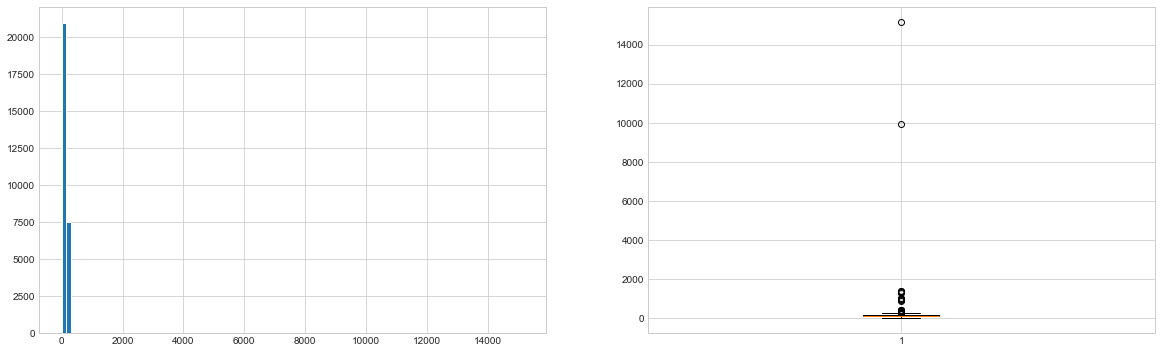

In [79]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emissions, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emissions, whis=2.5)

plt.show()

In [80]:
df.CO2_Emissions.describe()

count    28615.000000
mean       133.183671
std        121.683647
min          0.000000
25%        107.000000
50%        124.000000
75%        155.000000
max      15168.000000
Name: CO2_Emissions, dtype: float64

In [81]:
df.CO2_Emissions.value_counts().sort_index()

0.00        1410
0.50           3
1.00          11
3.00          24
5.00           1
7.00           2
8.00           2
10.00          8
13.00          1
14.00          5
15.00          2
16.00          2
17.00          3
18.00          3
19.00          1
20.00          1
21.00          1
22.00         22
23.00          2
24.00          4
25.00         13
26.00         40
27.00          4
28.00          8
29.00          8
30.00          5
31.00         18
32.00         16
33.00          9
34.00         46
35.00         21
36.00         21
37.00          9
37.50          1
38.00         30
39.00         25
40.00         27
41.00         39
42.00         44
43.00          5
44.00         11
45.00          2
46.00         15
47.00         29
48.00         18
49.00         39
50.00         14
51.00         10
52.00          8
53.00          1
54.00         18
55.00          6
55.50          2
56.00          2
56.50          2
59.00          8
63.50          2
64.00         30
65.00         

In [82]:
df.groupby(["Make_Model", "Body_Type", "CO2_Emissions"]).Price.describe()

count          mean  \
Make_Model   Body_Type        CO2_Emissions                        
Dacia        Compact          130.0            3.0  21431.000000   
             Sedan            130.0            1.0   9999.000000   
             Station wagon    130.0            1.0  21799.000000   
Dacia Break  Station wagon    124.0            1.0  20500.000000   
Dacia Dokker Compact          108.0            1.0  11930.000000   
...                                            ...           ...   
Volvo XC90   Off-Road/Pick-up 224.0            2.0  11850.000000   
                              306.0            2.0  16990.000000   
             Sedan            47.0             3.0  60366.666667   
             Station wagon    149.0            2.0  29500.000000   
                              152.0            2.0  36000.000000   

                                                      std      min      25%  \
Make_Model   Body_Type        CO2_Emissions                                   
Dacia        Compact          130.0           1661.743663  19515.0  20907.0   
             Sedan            130.0                   NaN   9999.0   9999.0   
             Station wagon    130.0                   NaN  21799.0  21799.0   
Dacia Break  Station wagon    124.0                   NaN  20500.0  20500.0   
Dacia Dokker Compact          108.0                   NaN  11930.0  11930.0   
...                                                   ...      ...      ...   
Volvo XC90   Off-Road/Pick-up 224.0              0.000000  11850.0  11850.0   
                              306.0              0.000000  16990.0  16990.0   
             Sedan            47.0           21250.254900  47700.0  48100.0   
             Station wagon    149.0              0.000000  29500.0  29500.0   
                              152.0              0.000000  36000.0  36000.0   

                                                 50%      75%      max  
Make_Model   Body_Type        CO2_Emissions                             
Dacia        Compact          130.0          22299.0  22389.0  22479.0  
             Sedan            130.0           9999.0   9999.0   9999.0  
             Station wagon    130.0          21799.0  21799.0  21799.0  
Dacia Break  Station wagon    124.0          20500.0  20500.0  20500.0  
Dacia Dokker Compact          108.0          11930.0  11930.0  11930.0  
...                                              ...      ...      ...  
Volvo XC90   Off-Road/Pick-up 224.0          11850.0  11850.0  11850.0  
                              306.0          16990.0  16990.0  16990.0  
             Sedan            47.0           48500.0  66700.0  84900.0  
             Station wagon    149.0          29500.0  29500.0  29500.0  
                              152.0          36000.0  36000.0  36000.0  

[7040 rows x 8 columns]

In [83]:
np.sort(df["CO2_Emissions"].unique())

array([0.0000e+00, 5.0000e-01, 1.0000e+00, 3.0000e+00, 5.0000e+00,
       7.0000e+00, 8.0000e+00, 1.0000e+01, 1.3000e+01, 1.4000e+01,
       1.5000e+01, 1.6000e+01, 1.7000e+01, 1.8000e+01, 1.9000e+01,
       2.0000e+01, 2.1000e+01, 2.2000e+01, 2.3000e+01, 2.4000e+01,
       2.5000e+01, 2.6000e+01, 2.7000e+01, 2.8000e+01, 2.9000e+01,
       3.0000e+01, 3.1000e+01, 3.2000e+01, 3.3000e+01, 3.4000e+01,
       3.5000e+01, 3.6000e+01, 3.7000e+01, 3.7500e+01, 3.8000e+01,
       3.9000e+01, 4.0000e+01, 4.1000e+01, 4.2000e+01, 4.3000e+01,
       4.4000e+01, 4.5000e+01, 4.6000e+01, 4.7000e+01, 4.8000e+01,
       4.9000e+01, 5.0000e+01, 5.1000e+01, 5.2000e+01, 5.3000e+01,
       5.4000e+01, 5.5000e+01, 5.5500e+01, 5.6000e+01, 5.6500e+01,
       5.9000e+01, 6.3500e+01, 6.4000e+01, 6.5000e+01, 6.6000e+01,
       6.8000e+01, 7.0000e+01, 7.1000e+01, 7.3000e+01, 7.5000e+01,
       7.5500e+01, 7.6000e+01, 7.8000e+01, 7.9000e+01, 8.0000e+01,
       8.1000e+01, 8.2000e+01, 8.3000e+01, 8.4000e+01, 8.5000e

In [84]:
df[(df["CO2_Emissions"] < 79) | (df["CO2_Emissions"] > 300)]

,Make_Model,Location,Price,Body_Type,Type,Doors,Mileage,Gearbox,Fuel_Type,Seller,Engine_Size,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package
1,Mercedes-Benz EQE 350,ES,80900.0,Compact,Pre-registered,4.0,5000.0,Automatic,Electric,Dealer,1.0,6.0,0.0,4WD,No info,Medium_security,Premium,2355.0,No,Part/Full Leather,efficient,0.0,215.0,4.50,Premium
12,Mercedes-Benz A 250,ES,23999.0,Compact,Used,5.0,25914.0,Automatic,Benzine,Dealer,1991.0,7.0,22.0,Front,Standard,Low_security,Standard,1445.0,No,Cloth,efficient,9.0,155.0,6.00,Standard
16,Mercedes-Benz A 250,BE,38999.0,Compact,Used,4.0,21496.0,Automatic,Benzine,Dealer,1332.0,7.0,22.0,Front,No info,Low_security,Standard,1680.0,No,Cloth,efficient,1.0,118.0,0.00,Standard
32,Mercedes-Benz A 250,ES,36900.0,Compact,Used,5.0,11990.0,Automatic,Benzine,Dealer,1332.0,8.0,22.0,Front,No info,Low_security,Standard,1680.0,No,Cloth,efficient,1.0,160.0,1.40,Standard
58,Mercedes-Benz A 250,DE,44785.0,Compact,Used,5.0,9000.0,Automatic,Benzine,Dealer,1332.0,8.0,0.0,Front,Standard,Medium_security,Premium,1680.0,Yes,Cloth,efficient,2.0,173.0,1.40,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28528,Volvo S90,ES,51900.0,Sedan,Used,4.0,5087.0,Automatic,Electric,Dealer,2.0,8.0,0.0,4WD,No info,Medium_security,Premium,1892.0,No,Part/Full Leather,efficient,1.0,287.0,6.30,Standard
28549,Volvo S90,NL,58900.0,Sedan,Used,4.0,10244.0,Automatic,Diesel,Dealer,1969.0,8.0,0.0,4WD,Standard,Medium_security,Premium,1728.0,Yes,Part/Full Leather,efficient,1.0,174.0,6.30,Premium
28568,Volvo S60,AT,57900.0,Sedan,Demonstration,4.0,12.0,Automatic,Benzine,Dealer,1969.0,8.0,53.0,4WD,No info,Low_security,Premium,2012.0,No,Part/Full Leather,efficient,0.0,233.0,5.15,Standard
28594,Volvo S60,FR,56999.0,Sedan,Used,4.0,13000.0,Automatic,Benzine,Dealer,1969.0,8.0,41.0,Front,Standard,Low_security,Standard,1735.0,No,Part/Full Leather,efficient,0.0,189.0,5.15,Standard


In [85]:
df.loc[(df["CO2_Emissions"] < 79) | (df["CO2_Emissions"] > 300) , "CO2_Emissions"] = np.nan

In [86]:
df["CO2_Emissions"].value_counts(dropna=False)

NaN       2319
124.00    1053
115.00     622
99.00      587
119.00     574
89.00      549
129.00     528
117.00     521
139.00     467
109.00     456
108.00     454
114.00     409
113.00     386
110.00     380
123.00     375
104.00     363
116.00     358
130.00     355
120.00     335
125.00     334
138.00     331
149.00     328
127.00     310
112.00     288
105.00     273
107.00     257
111.00     250
93.00      250
178.00     239
273.00     234
98.00      233
128.00     233
126.00     228
145.00     227
96.00      216
121.00     213
118.00     212
137.00     210
276.00     208
142.00     205
95.00      204
85.00      199
155.00     197
133.00     196
135.00     195
131.00     194
148.00     194
122.00     193
143.00     193
106.00     190
167.00     189
154.00     184
134.00     181
102.00     175
169.00     174
147.00     173
144.00     169
159.00     168
156.00     167
185.00     167
232.00     163
166.00     162
88.00      161
103.00     160
132.00     155
136.00     155
140.00    

In [87]:
for group1 in list(df["Make_Model"].unique()):
    for group2 in list(df["Body_Type"].unique()):
        for group3 in list(df["Fuel_Type"].unique()):
            cond1 = df["Make_Model"] == group1
            cond2 = (df["Make_Model"] == group1) & (df["Body_Type"] == group2)
            cond3 = (df["Make_Model"] == group1) & (
                df["Body_Type"] == group2) & (df["Fuel_Type"] == group3)
            mode1 = list(df[cond1]["CO2_Emissions"].mode())
            mode2 = list(df[cond2]["CO2_Emissions"].mode())
            mode3 = list(df[cond3]["CO2_Emissions"].mode())
            if mode3 != []:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df[cond3]["CO2_Emissions"].mode()[0])
            elif mode2 != []:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df[cond2]["CO2_Emissions"].mode()[0])
            elif mode1 != []:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df[cond1]["CO2_Emissions"].mode()[0])
            else:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df["CO2_Emissions"].mode()[0])

In [88]:
df.CO2_Emissions.isnull().sum()

0

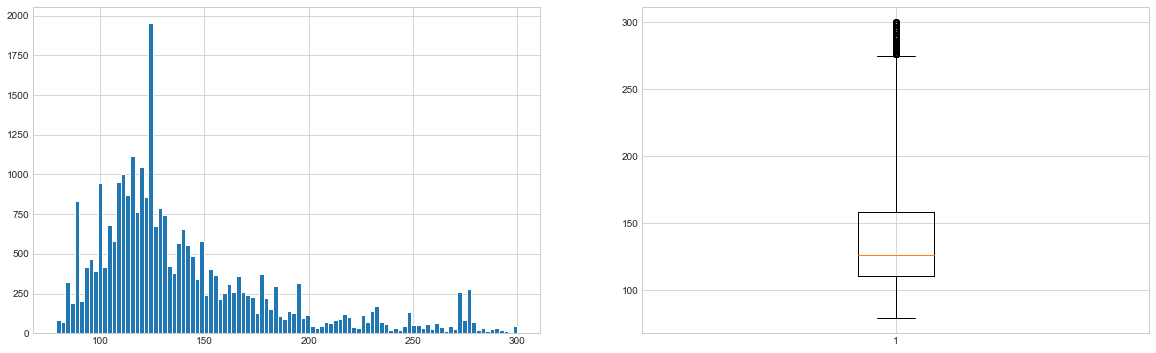

In [89]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emissions, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emissions, whis=2.5)

plt.show()

# Doors

In [118]:
first_looking("Doors")

COLUMN NAME    :  Doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.0    17546
2.0     4433
4.0     2934
3.0     1992
6.0        5
1.0        1
Name: Doors, dtype: int64


In [120]:
df[df["Doors"]==1]["Make_Model"]

21140    Ford Fiesta
Name: Make_Model, dtype: object

In [122]:
df[df["Make_Model"]=="Fiat 124 Spider"][["Make_Model", "Body_Type", "Doors"]].value_counts(dropna=False)

Make_Model       Body_Type    Doors
Fiat 124 Spider  Convertible  2.0      54
                 Coupe        2.0      37
                 Convertible  3.0       1
dtype: int64

In [123]:
df[df["Make_Model"]=="Ford Fiesta"][["Make_Model", "Body_Type", "Doors"]].value_counts(dropna=False)

Make_Model   Body_Type  Doors
Ford Fiesta  Compact    5.0      137
             Sedan      5.0      120
             Compact    3.0       76
             Sedan      3.0       30
             Compact    4.0       18
             Sedan      4.0        6
             Compact    2.0        5
             Coupe      3.0        2
             Sedan      2.0        2
             Compact    1.0        1
             Coupe      5.0        1
dtype: int64

In [124]:
df[df["Doors"]==6]["Make_Model"]

15931     Dacia Logan
16097     Dacia Logan
16105    Dacia Dokker
16129     Dacia Logan
16163     Dacia Logan
Name: Make_Model, dtype: object

In [125]:
df["Doors"].replace([1, 6], np.nan, inplace=True)

In [126]:
df["Doors"].isnull().sum()

6

In [127]:
fill(df, "Make_Model", "Body_Type", "Doors", "mode")

Number of NaN :  0
------------------
5.0    17552
2.0     4433
4.0     2934
3.0     1992
Name: Doors, dtype: int64


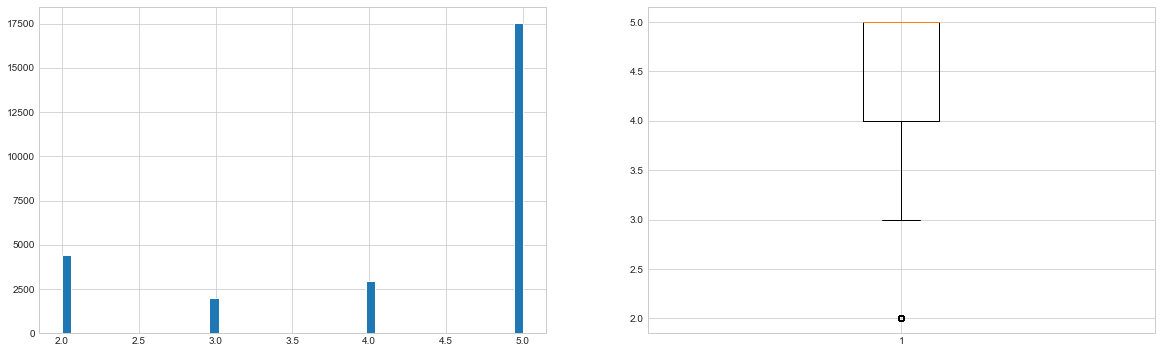

In [128]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Doors, bins=50)

plt.subplot(122)
plt.boxplot(df.Doors)

plt.show()

In [131]:
print(df.shape)
df.drop("Doors", axis=1, inplace=True)
print(df.shape)

(26911, 25)
(26911, 24)


## Fuel_Consumption_comb

In [138]:
first_looking("Fuel_Consumption_comb")

COLUMN NAME    :  Fuel_Consumption_comb
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  227
--------------------------------
4.90     1170
5.00     1069
4.80      879
5.10      874
5.40      770
4.50      755
4.70      699
4.60      697
5.20      674
5.30      662
4.30      655
5.60      616
4.20      583
5.70      578
0.00      578
6.30      574
5.90      571
4.10      548
4.00      529
3.80      520
5.50      513
4.40      486
6.40      430
5.80      404
6.00      403
3.90      367
3.70      362
7.00      348
7.40      321
6.80      321
6.50      314
3.60      312
7.20      290
6.90      289
3.40      288
6.10      285
6.60      274
6.20      265
6.70      251
7.10      245
7.30      230
8.90      222
12.00     208
8.20      188
7.60      180
8.00      175
3.50      173
8.40      161
7.70      151
7.80      147
5.15      137
7.50      130
3.30      107
11.40     103
5.85      102
9.00      101
9.20       95
12.50      94
4.85       86
8.

In [139]:
df.Fuel_Consumption_comb.describe()

count    26911.000000
mean         5.701730
std          2.661552
min          0.000000
25%          4.500000
50%          5.200000
75%          6.500000
max         99.900000
Name: Fuel_Consumption_comb, dtype: float64

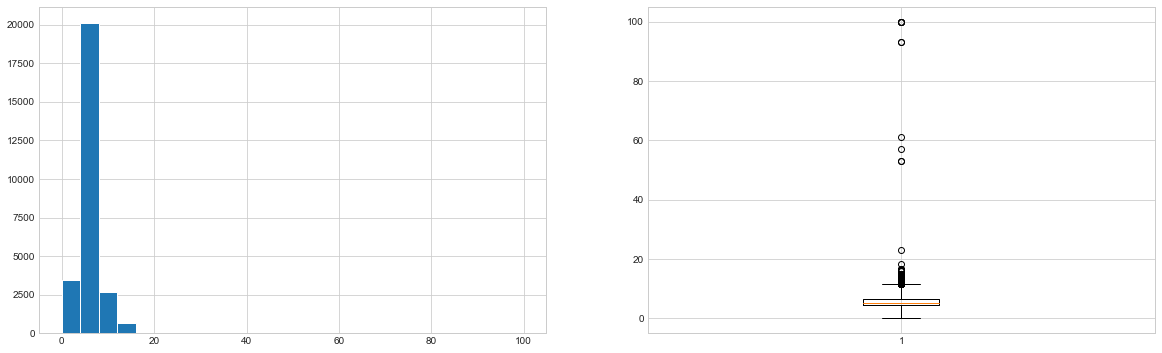

In [140]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.Fuel_Consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.Fuel_Consumption_comb, whis=2.5)

plt.show()

In [141]:
df.sort_values(by=["Fuel_Consumption_comb"], ascending=False)["Fuel_Consumption_comb"].head(20)

18378    99.9
18379    99.9
22388    99.9
265      99.9
20477    93.0
20460    93.0
1771     61.0
6536     57.0
23485    53.0
23329    53.0
20790    23.0
20961    18.3
20996    16.8
10303    16.7
1214     16.5
1253     16.5
864      16.4
7632     16.0
1299     15.9
423      15.1
Name: Fuel_Consumption_comb, dtype: float64

In [142]:
df.sort_values(by=["Fuel_Consumption_comb"], ascending=True)["Fuel_Consumption_comb"].head(20)

19075    0.0
10804    0.0
10789    0.0
10301    0.0
10134    0.0
10076    0.0
1403     0.0
9937     0.0
10819    0.0
9707     0.0
20275    0.0
20341    0.0
20342    0.0
1368     0.0
20374    0.0
20382    0.0
9376     0.0
9471     0.0
9355     0.0
10882    0.0
Name: Fuel_Consumption_comb, dtype: float64

In [143]:
df.groupby(["Make_Model", "Body_Type", "Fuel_Type", "Fuel_Consumption_comb"]).Mileage.describe()

count  \
Make_Model  Body_Type        Fuel_Type Fuel_Consumption_comb          
Dacia       Compact          Benzine   5.0                      1.0   
                                       5.1                      1.0   
                                       5.3                      1.0   
            Station wagon    Benzine   4.0                      1.0   
Dacia Break Station wagon    Benzine   6.9                      1.0   
...                                                             ...   
Volvo XC90  Off-Road/Pick-up Electric  5.2                      1.0   
                                       5.3                      1.0   
                                       5.6                      1.0   
            Sedan            Diesel    4.8                      3.0   
            Station wagon    Diesel    4.8                      4.0   

                                                                       mean  \
Make_Model  Body_Type        Fuel_Type Fuel_Consumption_comb                  
Dacia       Compact          Benzine   5.0                      2376.000000   
                                       5.1                       110.000000   
                                       5.3                       110.000000   
            Station wagon    Benzine   4.0                      2000.000000   
Dacia Break Station wagon    Benzine   6.9                       999.000000   
...                                                                     ...   
Volvo XC90  Off-Road/Pick-up Electric  5.2                     12500.000000   
                                       5.3                     68299.000000   
                                       5.6                     68299.000000   
            Sedan            Diesel    4.8                     58761.333333   
            Station wagon    Diesel    4.8                    146775.000000   

                                                                       std  \
Make_Model  Body_Type        Fuel_Type Fuel_Consumption_comb                 
Dacia       Compact          Benzine   5.0                             NaN   
                                       5.1                             NaN   
                                       5.3                             NaN   
            Station wagon    Benzine   4.0                             NaN   
Dacia Break Station wagon    Benzine   6.9                             NaN   
...                                                                    ...   
Volvo XC90  Off-Road/Pick-up Electric  5.2                             NaN   
                                       5.3                             NaN   
                                       5.6                             NaN   
            Sedan            Diesel    4.8                    34192.796176   
            Station wagon    Diesel    4.8                     3723.909236   

                                                                   min  \
Make_Model  Body_Type        Fuel_Type Fuel_Consumption_comb             
Dacia       Compact          Benzine   5.0                      2376.0   
                                       5.1                       110.0   
                                       5.3                       110.0   
            Station wagon    Benzine   4.0                      2000.0   
Dacia Break Station wagon    Benzine   6.9                       999.0   
...                                                                ...   
Volvo XC90  Off-Road/Pick-up Electric  5.2                     12500.0   
                                       5.3                     68299.0   
                                       5.6                     68299.0   
            Sedan            Diesel    4.8                     20635.0   
            Station wagon    Diesel    4.8                    143550.0   

                                                                   25%  \
Make_Model  Body_Type        Fuel_Type Fuel_Consumption_co

In [144]:
cond_cons_avg = (df["Fuel_Consumption_comb"] >= 20)
df.loc[cond_cons_avg, "Fuel_Consumption_comb"] = np.nan

In [145]:
df["Fuel_Consumption_comb"].isnull().sum()

11

In [146]:
fill(df, "Make_Model", "Body_Type", "Fuel_Consumption_comb", "median")

Number of NaN :  0
------------------
4.90     1170
5.00     1071
4.80      879
5.10      874
5.40      770
4.50      755
4.70      700
4.60      698
5.20      674
5.30      662
4.30      655
5.60      616
4.20      583
0.00      578
5.70      578
6.30      575
5.90      571
4.10      549
4.00      529
3.80      520
5.50      513
4.40      487
6.40      430
5.80      404
6.00      403
3.90      367
3.70      362
7.00      348
6.80      321
7.40      321
6.50      314
3.60      312
7.20      290
6.90      289
3.40      288
6.10      285
6.60      274
6.20      265
6.70      251
7.10      245
7.30      230
8.90      222
12.00     209
8.20      189
7.60      181
8.00      175
3.50      173
8.40      161
7.70      151
7.80      147
5.15      137
7.50      130
3.30      107
11.40     103
5.85      102
9.00      101
9.20       95
12.50      94
4.85       86
8.30       84
3.00       80
4.65       78
9.60       76
9.80       75
9.50       75
1.70       75
8.70       75
7.90       72
8.60      

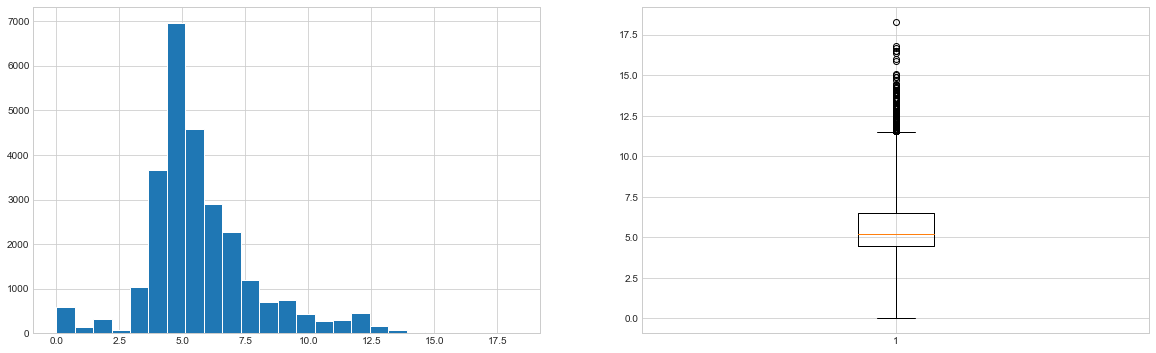

In [147]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.Fuel_Consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.Fuel_Consumption_comb, whis=2.5)

plt.show()

# Final_Step

In [153]:
df.head(3).T

,0,3,4
Make_Model,Mercedes-Benz A 160,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
Location,ES,ES,ES
Price,16950.0,46990.0,16800.0
Body_Type,Compact,Compact,Compact
Type,Used,Used,Used
Mileage,120200.0,18995.0,197000.0
Gearbox,Manual,Automatic,Automatic
Fuel_Type,Diesel,Benzine,Diesel
Seller,Dealer,Dealer,Dealer
Engine_Size,1595.0,1991.0,2143.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25130 entries, 0 to 28629
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Make_Model                   25130 non-null  object 
 1   Location                     25130 non-null  object 
 2   Price                        25130 non-null  float64
 3   Body_Type                    25130 non-null  object 
 4   Type                         25130 non-null  object 
 5   Mileage                      25130 non-null  float64
 6   Gearbox                      25130 non-null  object 
 7   Fuel_Type                    25130 non-null  object 
 8   Seller                       25130 non-null  object 
 9   Engine_Size                  25130 non-null  float64
 10  Gears                        25130 non-null  float64
 11  CO2_Emissions                25130 non-null  float64
 12  Drivetrain                   25130 non-null  object 
 13  Entertainment_Me

In [155]:
numeric_col.head()

,Price,Doors,Mileage,Seats,Engine_Size,Gears,CO2_Emissions,Empty_Weight,Age,power_kW,Fuel_Consumption_comb
0,16950.0,5.0,120200.0,5.0,1595.0,5.0,98.0,1270.0,6.0,75.0,3.8
1,80900.0,4.0,5000.0,5.0,1.0,9.0,0.0,2355.0,0.0,215.0,4.5
2,69900.0,5.0,18900.0,5.0,1991.0,8.0,162.0,1555.0,2.0,310.0,8.4
3,46990.0,5.0,18995.0,5.0,1991.0,7.0,169.0,1455.0,2.0,225.0,7.3
4,16800.0,5.0,197000.0,5.0,2143.0,7.0,162.0,1545.0,7.0,100.0,4.9


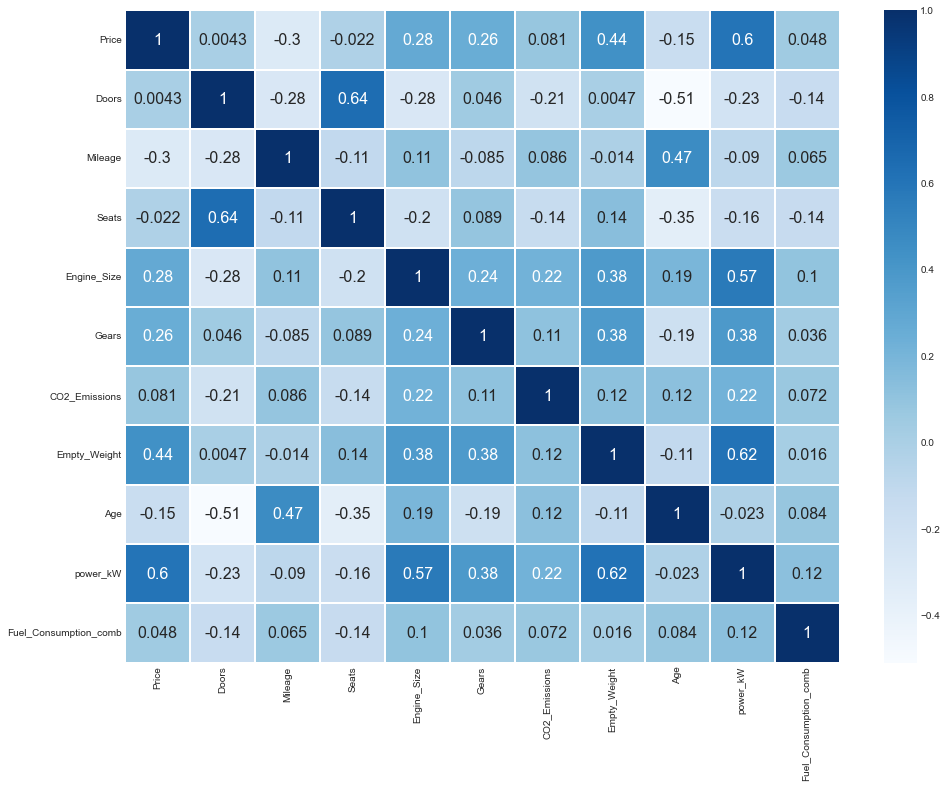

In [156]:
plt.figure(figsize=(16, 12))

sns.heatmap(numeric_col.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [157]:
target = 'Price'

corr_by_target = df.corr()[target].sort_values()
corr_by_target

Age                     -0.582460
Mileage                 -0.526446
Fuel_Consumption_comb   -0.087933
CO2_Emissions            0.143615
Engine_Size              0.301882
Empty_Weight             0.548822
power_kW                 0.591995
Gears                    0.619585
Price                    1.000000
Name: Price, dtype: float64

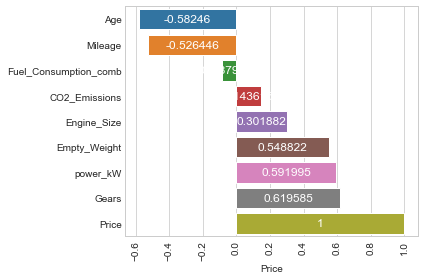

In [158]:
ax = sns.barplot(y = corr_by_target.index, x = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fontsize=12, rotation=0, label_type='center', color="white")

In [159]:
df.duplicated(keep=False).sum()

1553

In [160]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(25130, 24)
(24177, 24)


In [149]:
def remove_outliers(df, cols):
    for col in cols:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 -q1
        lower_bound = q1 -(iqr * 1.5)
        upper_bound = q3 + (iqr * 1.5)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df, ['Price'])

In [161]:
df.to_csv("final_scout_not_dummy2022.csv", index=False)
pd.read_csv("final_scout_not_dummy2022.csv")

,Make_Model,Location,Price,Body_Type,Type,Mileage,Gearbox,Fuel_Type,Seller,Engine_Size,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package
0,Mercedes-Benz A 160,ES,16950.0,Compact,Used,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,No info,Low_security,Standard,1270.0,No,Cloth,efficient,6.0,75.0,3.80,Standard
1,Mercedes-Benz A 35 AMG,ES,46990.0,Compact,Used,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Standard,Low_security,Standard,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.30,Standard
2,Mercedes-Benz A 45 AMG,ES,16800.0,Compact,Used,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Standard,Low_security,Standard,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.90,Standard
3,Mercedes-Benz C 160,DE,4690.0,Compact,Used,165000.0,Manual,Benzine,Dealer,1799.0,6.0,196.0,Rear,Standard,Medium_security,Standard,1465.0,Yes,Cloth,efficient,17.0,90.0,8.20,Standard
4,Mercedes-Benz CLA 180,ES,22550.0,Compact,Used,83339.0,Manual,Diesel,Dealer,1595.0,7.0,134.0,Front,No info,Low_security,Premium,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.40,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,Volvo S60,ES,4999.0,Sedan,Used,166512.0,Manual,Benzine,Dealer,2521.0,5.0,145.0,Front,Standard,Medium_security,Standard,1550.0,No,Part/Full Leather,efficient,18.0,154.0,5.15,Standard
24173,Volvo S40,NL,5499.0,Sedan,Used,145000.0,Automatic,Benzine,Dealer,2435.0,5.0,217.0,Front,Standard,Medium_security,Standard,1357.0,Yes,Cloth,efficient,18.0,125.0,9.55,Standard
24174,Volvo C30,BE,7300.0,Sedan,Used,96000.0,Manual,Diesel,Dealer,1560.0,6.0,99.0,Front,Standard,Medium_security,Standard,1356.0,Yes,Cloth,unefficient,11.0,84.0,5.90,Standard
24175,Volvo S90,NL,29900.0,Sedan,Used,94343.0,Automatic,Benzine,Dealer,1969.0,8.0,149.0,4WD,Standard,Low_security,Standard,1617.0,Yes,Part/Full Leather,efficient,5.0,187.0,6.30,Standard


In [162]:
print(df.shape)
# df.drop(["location", "full_location", "zip_country", "latitude", "longitude"], axis=1, inplace=True)
df.drop(["Location"], axis=1, inplace=True)
print(df.shape)

(24177, 24)
(24177, 23)


In [163]:
categoric_col = df.select_dtypes(include="object")
display(categoric_col.columns)

Index(['Make_Model', 'Body_Type', 'Type', 'Gearbox', 'Fuel_Type', 'Seller',
       'Drivetrain', 'Entertainment_Media', 'Safety_Security', 'Extras',
       'Full_Service_History', 'Upholstery', 'Energy_Efficiency_Class',
       'Comfort_Convenience_Package'],
      dtype='object')

In [164]:
df[["make_model_ordinal", "type_ordinal", "gearbox_ordinal"]] = df[["Make_Model", "Type", "Gearbox"]].apply(lambda x: pd.factorize(x)[0])
df.head()

,Make_Model,Price,Body_Type,Type,Mileage,Gearbox,Fuel_Type,Seller,Engine_Size,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package,make_model_ordinal,type_ordinal,gearbox_ordinal
0,Mercedes-Benz A 160,16950.0,Compact,Used,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,No info,Low_security,Standard,1270.0,No,Cloth,efficient,6.0,75.0,3.8,Standard,0,0,0
3,Mercedes-Benz A 35 AMG,46990.0,Compact,Used,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Standard,Low_security,Standard,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.3,Standard,1,0,1
4,Mercedes-Benz A 45 AMG,16800.0,Compact,Used,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Standard,Low_security,Standard,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.9,Standard,2,0,1
5,Mercedes-Benz C 160,4690.0,Compact,Used,165000.0,Manual,Benzine,Dealer,1799.0,6.0,196.0,Rear,Standard,Medium_security,Standard,1465.0,Yes,Cloth,efficient,17.0,90.0,8.2,Standard,3,0,0
6,Mercedes-Benz CLA 180,22550.0,Compact,Used,83339.0,Manual,Diesel,Dealer,1595.0,7.0,134.0,Front,No info,Low_security,Premium,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.4,Standard,4,0,0


In [165]:
make_model_ordinal = df.pop("make_model_ordinal")
df.insert(1, 'make_model_ordinal', make_model_ordinal)
df.head()

,Make_Model,make_model_ordinal,Price,Body_Type,Type,Mileage,Gearbox,Fuel_Type,Seller,Engine_Size,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package,type_ordinal,gearbox_ordinal
0,Mercedes-Benz A 160,0,16950.0,Compact,Used,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,No info,Low_security,Standard,1270.0,No,Cloth,efficient,6.0,75.0,3.8,Standard,0,0
3,Mercedes-Benz A 35 AMG,1,46990.0,Compact,Used,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Standard,Low_security,Standard,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.3,Standard,0,1
4,Mercedes-Benz A 45 AMG,2,16800.0,Compact,Used,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Standard,Low_security,Standard,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.9,Standard,0,1
5,Mercedes-Benz C 160,3,4690.0,Compact,Used,165000.0,Manual,Benzine,Dealer,1799.0,6.0,196.0,Rear,Standard,Medium_security,Standard,1465.0,Yes,Cloth,efficient,17.0,90.0,8.2,Standard,0,0
6,Mercedes-Benz CLA 180,4,22550.0,Compact,Used,83339.0,Manual,Diesel,Dealer,1595.0,7.0,134.0,Front,No info,Low_security,Premium,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.4,Standard,0,0


In [166]:
type_ordinal = df.pop("type_ordinal")

gearbox_ordinal = df.pop("gearbox_ordinal")

# Let's insert the columns we have popp

df.insert(6, "type_ordinal", type_ordinal)

df.insert(11, "gearbox_ordinal", gearbox_ordinal)

df.head()

,Make_Model,make_model_ordinal,Price,Body_Type,Type,Mileage,type_ordinal,Gearbox,Fuel_Type,Seller,Engine_Size,gearbox_ordinal,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package
0,Mercedes-Benz A 160,0,16950.0,Compact,Used,120200.0,0,Manual,Diesel,Dealer,1595.0,0,5.0,98.0,Front,No info,Low_security,Standard,1270.0,No,Cloth,efficient,6.0,75.0,3.8,Standard
3,Mercedes-Benz A 35 AMG,1,46990.0,Compact,Used,18995.0,0,Automatic,Benzine,Dealer,1991.0,1,7.0,169.0,4WD,Standard,Low_security,Standard,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.3,Standard
4,Mercedes-Benz A 45 AMG,2,16800.0,Compact,Used,197000.0,0,Automatic,Diesel,Dealer,2143.0,1,7.0,162.0,4WD,Standard,Low_security,Standard,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.9,Standard
5,Mercedes-Benz C 160,3,4690.0,Compact,Used,165000.0,0,Manual,Benzine,Dealer,1799.0,0,6.0,196.0,Rear,Standard,Medium_security,Standard,1465.0,Yes,Cloth,efficient,17.0,90.0,8.2,Standard
6,Mercedes-Benz CLA 180,4,22550.0,Compact,Used,83339.0,0,Manual,Diesel,Dealer,1595.0,0,7.0,134.0,Front,No info,Low_security,Premium,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.4,Standard


In [167]:
print(df.shape)
df.drop(["Make_Model", "Type", "Gearbox"], axis=1, inplace=True)
print(df.shape)

df.head()

(24177, 26)
(24177, 23)


,make_model_ordinal,Price,Body_Type,Mileage,type_ordinal,Fuel_Type,Seller,Engine_Size,gearbox_ordinal,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package
0,0,16950.0,Compact,120200.0,0,Diesel,Dealer,1595.0,0,5.0,98.0,Front,No info,Low_security,Standard,1270.0,No,Cloth,efficient,6.0,75.0,3.8,Standard
3,1,46990.0,Compact,18995.0,0,Benzine,Dealer,1991.0,1,7.0,169.0,4WD,Standard,Low_security,Standard,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.3,Standard
4,2,16800.0,Compact,197000.0,0,Diesel,Dealer,2143.0,1,7.0,162.0,4WD,Standard,Low_security,Standard,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.9,Standard
5,3,4690.0,Compact,165000.0,0,Benzine,Dealer,1799.0,0,6.0,196.0,Rear,Standard,Medium_security,Standard,1465.0,Yes,Cloth,efficient,17.0,90.0,8.2,Standard
6,4,22550.0,Compact,83339.0,0,Diesel,Dealer,1595.0,0,7.0,134.0,Front,No info,Low_security,Premium,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.4,Standard


In [168]:
df.Extras.str.count(",").add(1)

0        1
3        1
4        1
5        1
6        1
        ..
28624    1
28626    1
28627    1
28628    1
28629    1
Name: Extras, Length: 24177, dtype: int64

In [169]:
df["Extras"].apply(lambda x: x.count(",")).add(1)

0        1
3        1
4        1
5        1
6        1
        ..
28624    1
28626    1
28627    1
28628    1
28629    1
Name: Extras, Length: 24177, dtype: int64

In [170]:
df["num_of_extras"] = df["Extras"].apply(lambda x: x.count(",")).add(1)

df.head()

,make_model_ordinal,Price,Body_Type,Mileage,type_ordinal,Fuel_Type,Seller,Engine_Size,gearbox_ordinal,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package,num_of_extras
0,0,16950.0,Compact,120200.0,0,Diesel,Dealer,1595.0,0,5.0,98.0,Front,No info,Low_security,Standard,1270.0,No,Cloth,efficient,6.0,75.0,3.8,Standard,1
3,1,46990.0,Compact,18995.0,0,Benzine,Dealer,1991.0,1,7.0,169.0,4WD,Standard,Low_security,Standard,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.3,Standard,1
4,2,16800.0,Compact,197000.0,0,Diesel,Dealer,2143.0,1,7.0,162.0,4WD,Standard,Low_security,Standard,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.9,Standard,1
5,3,4690.0,Compact,165000.0,0,Benzine,Dealer,1799.0,0,6.0,196.0,Rear,Standard,Medium_security,Standard,1465.0,Yes,Cloth,efficient,17.0,90.0,8.2,Standard,1
6,4,22550.0,Compact,83339.0,0,Diesel,Dealer,1595.0,0,7.0,134.0,Front,No info,Low_security,Premium,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.4,Standard,1


In [171]:
print(df.shape)
df.drop("Extras", axis=1, inplace=True)
print(df.shape)

df.head().T

(24177, 24)
(24177, 23)


,0,3,4,5,6
make_model_ordinal,0,1,2,3,4
Price,16950.0,46990.0,16800.0,4690.0,22550.0
Body_Type,Compact,Compact,Compact,Compact,Compact
Mileage,120200.0,18995.0,197000.0,165000.0,83339.0
type_ordinal,0,0,0,0,0
Fuel_Type,Diesel,Benzine,Diesel,Benzine,Diesel
Seller,Dealer,Dealer,Dealer,Dealer,Dealer
Engine_Size,1595.0,1991.0,2143.0,1799.0,1595.0
gearbox_ordinal,0,1,1,0,0
Gears,5.0,7.0,7.0,6.0,7.0


In [172]:
df["Comfort_Convenience_Package"].value_counts()

Standard        16335
Premium          7794
Premium Plus       48
Name: Comfort_Convenience_Package, dtype: int64

In [173]:
df["Comfort_Convenience_Package"] = df["Comfort_Convenience_Package"].astype("category")

df.dtypes

make_model_ordinal                int64
Price                           float64
Body_Type                        object
Mileage                         float64
type_ordinal                      int64
Fuel_Type                        object
Seller                           object
Engine_Size                     float64
gearbox_ordinal                   int64
Gears                           float64
CO2_Emissions                   float64
Drivetrain                       object
Entertainment_Media              object
Safety_Security                  object
Empty_Weight                    float64
Full_Service_History             object
Upholstery                       object
Energy_Efficiency_Class          object
Age                             float64
power_kW                        float64
Fuel_Consumption_comb           float64
Comfort_Convenience_Package    category
num_of_extras                     int64
dtype: object

In [174]:
# We can access the codes of the categories by running df["comfort_convenience_package"].cat.codes

df["Comfort_Convenience_Package"] = df["Comfort_Convenience_Package"].cat.codes

df.head()

,make_model_ordinal,Price,Body_Type,Mileage,type_ordinal,Fuel_Type,Seller,Engine_Size,gearbox_ordinal,Gears,CO2_Emissions,Drivetrain,Entertainment_Media,Safety_Security,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package,num_of_extras
0,0,16950.0,Compact,120200.0,0,Diesel,Dealer,1595.0,0,5.0,98.0,Front,No info,Low_security,1270.0,No,Cloth,efficient,6.0,75.0,3.8,2,1
3,1,46990.0,Compact,18995.0,0,Benzine,Dealer,1991.0,1,7.0,169.0,4WD,Standard,Low_security,1455.0,No,Part/Full Leather,unefficient,2.0,225.0,7.3,2,1
4,2,16800.0,Compact,197000.0,0,Diesel,Dealer,2143.0,1,7.0,162.0,4WD,Standard,Low_security,1545.0,No,Part/Full Leather,unefficient,7.0,100.0,4.9,2,1
5,3,4690.0,Compact,165000.0,0,Benzine,Dealer,1799.0,0,6.0,196.0,Rear,Standard,Medium_security,1465.0,Yes,Cloth,efficient,17.0,90.0,8.2,2,1
6,4,22550.0,Compact,83339.0,0,Diesel,Dealer,1595.0,0,7.0,134.0,Front,No info,Low_security,1410.0,No,Part/Full Leather,unefficient,4.0,90.0,5.4,2,1


In [175]:
df["Comfort_Convenience_Package"].value_counts()

2    16335
0     7794
1       48
Name: Comfort_Convenience_Package, dtype: int64

## Label Encoding using sklearn Machine Learning library:

In [176]:
from sklearn.preprocessing import LabelEncoder

In [178]:
# Creating an instance of LabelEncoder() and storing it in labelencoder variable/object
labelencoder = LabelEncoder()

# Applying LabelEncoder for the columns of "safety_security_package" & "entertainment_media_package"
df[["safety_security_package_labeled", "entertainment_media_package_labeled"]] = df[["Safety_Security", "Entertainment_Media"]].apply(labelencoder.fit_transform)
df[["Safety_Security", "safety_security_package_labeled", "Entertainment_Media", "entertainment_media_package_labeled"]]

,Safety_Security,safety_security_package_labeled,Entertainment_Media,entertainment_media_package_labeled
0,Low_security,1,No info,0
3,Low_security,1,Standard,2
4,Low_security,1,Standard,2
5,Medium_security,2,Standard,2
6,Low_security,1,No info,0
...,...,...,...,...
28624,Medium_security,2,Standard,2
28626,Medium_security,2,Standard,2
28627,Medium_security,2,Standard,2
28628,Low_security,1,Standard,2


In [180]:
df.dtypes

make_model_ordinal                       int64
Price                                  float64
Body_Type                               object
Mileage                                float64
type_ordinal                             int64
Fuel_Type                               object
Seller                                  object
Engine_Size                            float64
gearbox_ordinal                          int64
Gears                                  float64
CO2_Emissions                          float64
Drivetrain                              object
Entertainment_Media                     object
Safety_Security                         object
Empty_Weight                           float64
Full_Service_History                    object
Upholstery                              object
Energy_Efficiency_Class                 object
Age                                    float64
power_kW                               float64
Fuel_Consumption_comb                  float64
Comfort_Conve

In [181]:
print(df.shape)
df.drop(["Safety_Security", "Entertainment_Media"], axis=1, inplace=True)
print(df.shape)

(24177, 25)
(24177, 23)


In [183]:
# df = df.join(df["make"].str.get_dummies()).drop('make', axis=1)
# df = df.join(df["body_type"].str.get_dummies()).drop('body_type', axis=1)

for column in ['Body_Type']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
    df.drop(column, axis=1, inplace=True)
    
df.T

,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,78,79,81,82,83,...,28531,28532,28534,28535,28538,28539,28540,28541,28542,28543,28544,28545,28546,28547,28548,28550,28551,28552,28553,28554,28555,28556,28561,28563,28565,28566,28567,28569,28570,28571,28572,28574,28575,28576,28577,28578,28579,28580,28581,28582,28584,28585,28586,28587,28588,28589,28590,28591,28592,28593,28596,28597,28598,28599,28600,28603,28604,28605,28606,28607,28608,28609,28610,28611,28612,28613,28618,28619,28620,28623,28624,28626,28627,28628,28629
make_model_ordinal,0,1,2,3,4,5,1,6,0,2,7,8,2,8,7,1,8,2,8,8,8,6,0,2,6,6,8,7,9,8,8,8,10,8,8,8,0,8,8,5,8,8,8,8,6,6,8,8,8,6,8,8,7,8,6,8,8,6,6,11,6,5,6,10,8,6,12,8,8,8,11,6,7,0,8,...,441,431,431,437,431,439,429,429,434,431,439,431,431,431,439,434,439,431,429,431,431,439,429,431,431,431,431,429,437,431,433,429,429,439,432,429,431,442,434,431,434,441,439,431,429,431,431,439,431,429,431,429,429,429,431,433,431,429,437,439,437,437,431,429,432,431,439,431,439,429,431,432,433,439,430
Price,16950.0,46990.0,16800.0,4690.0,22550.0,26900.0,44999.0,23900.0,14200.0,37999.0,23999.0,24400.0,16999.0,7450.0,38999.0,41900.0,29800.0,37490.0,21000.0,26800.0,32900.0,32950.0,13999.0,29990.0,8300.0,32950.0,32950.0,36900.0,29800.0,18390.0,25900.0,25400.0,29000.0,29900.0,14490.0,20630.0,27500.0,8490.0,23850.0,35500.0,29900.0,25900.0,16700.0,27460.0,17399.0,23999.0,20630.0,21000.0,29900.0,27999.0,25600.0,26850.0,44785.0,25990.0,34995.0,27800.0,29999.0,38350.0,23400.0,7350.0,21450.0,43880.0,23900.0,38880.0,27900.0,33900.0,37900.0,27490.0,24780.0,9770.0,6990.0,7000.0,33999.0,25950.0,31950.0,...,35990.0,13945.0,10750.0,18900.0,19400.0,29900.0,13499.0,13480.0,19990.0,20990.0,26900.0,3900.0,18900.0,11199.0,35488.0,13500.0,37900.0,36400.0,14900.0,7940.0,39900.0,31488.0,15999.0,8945.0,39900.0,39990.0,37488.0,11600.0,49900.0,46890.0,4500.0,18500.0,21450.0,36900.0,8950.0,16990.0,44450.0,39500.0,17499.0,43420.0,24700.0,31990.0,39990.0,38700.0,19999.0,18500.0,48900.0,46690.0,43700.0,18999.0,3900.0,17800.0,12990.0,17400.0,36795.0,5500.0,10950.0,13500.0,37990.0,29750.0,24900.0,34990.0,3900.0,10450.0,6490.0,15800.0,46500.0,33500.0,38000.0,13000.0,4999.0,5499.0,7300.0,29900.0,4440.0
Mileage,120200.0,18995.0,197000.0,165000.0,83339.0,48900.0,56876.0,21854.0,99016.0,90000.0,25914.0,27150.0,210000.0,157500.0,21496.0,44000.0,21734.0,81500.0,172700.0,18989.0,25.0,24244.0,128644.0,120000.0,71752.0,34942.0,20124.0,11990.0,55226.0,63871.0,26900.0,87700.0,45701.0,52497.0,118059.0,98258.0,11394.0,141980.0,71098.0,26000.0,26500.0,43987.0,139000.0,58813.0,100640.0,100000.0,98258.0,172700.0,68900.0,41272.0,49600.0,28330.0,9000.0,67626.0,8828.0,61618.0,17115.0,8000.0,87500.0,61170.0,116715.0,8000.0,98781.0,22000.0,19785.0,35758.0,126000.0,91754.0,46403.0,49658.0,135000.0,96000.0,12265.0,13863.0,23644.0,...,3200.0,198999.0,110991.0,80000.0,127579.0,75000.0,173561.0,145306.0,53000.0,65237.0,98916.0,218000.0,39234.0,105173.0,7850.0,133624.0,37846.0,5894.0,104856.0,164366.0,12900.0,84000.0,85225.0,129846.0,15700.0,14800.0,17282.0,142912.0,11737.0,9990.0,199215.0,23351.0,26000.0,14200.0,82776.0,79650.0,6367.0,40100.0,90000.0,4124.0,38150.0,91800.0,9496.0,5600.0,52845.0,116200.0,9900.0,11600.0,13500.0,93257.0,207839.0,100047.0,75747.0,51000.0,10.0,170712.0,124000.0,109000.0,75500.0,89000.0,89900.0,110021.0,298000.0,125000.0,78000.0,48900.0,14000.0,53000.0,44873.0,114000.0,166512.0,145000.0,96000.0,94343.0,230047.0
type_ordinal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fuel_Type,Diesel,Benzine,Diesel,Benzine,Diesel,Benzine,Benzine,Diesel,Diesel,Benzine,Benzine,Diesel,Diesel,D

In [188]:
df["Fuel_Type"] = df["Fuel_Type"].map({"Benzine":0, "Diesel":1, "Liquid/Natural Gas":2, "Electric":3})
df["Seller"] = df["Seller"].map({"Private seller":0, "Dealer":1})
df["Drivetrain"] = df["Drivetrain"].map({"Rear":0, "Front":1, "4WD":2})
df["Full_Service_History"] = df["Full_Service_History"].map({"No":0, "Yes":1})
df["Upholstery"] = df["Upholstery"].map({"Cloth":0, "Part/Full Leather":1})
df["Energy_Efficiency_Class"] = df["Energy_Efficiency_Class"].map({"unefficient":0, "efficient":1})

df.head()

,make_model_ordinal,Price,Mileage,type_ordinal,Fuel_Type,Seller,Engine_Size,gearbox_ordinal,Gears,CO2_Emissions,Drivetrain,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package,num_of_extras,safety_security_package_labeled,entertainment_media_package_labeled,Compact,Convertible,Coupe,Off-Road/Pick-up,Sedan,Station wagon
0,0,16950.0,120200.0,0,1,1,1595.0,0,5.0,98.0,1,1270.0,0,0,1,6.0,75.0,3.8,2,1,1,0,1,0,0,0,0,0
1,1,46990.0,18995.0,0,0,1,1991.0,1,7.0,169.0,2,1455.0,0,1,0,2.0,225.0,7.3,2,1,1,2,1,0,0,0,0,0
2,2,16800.0,197000.0,0,1,1,2143.0,1,7.0,162.0,2,1545.0,0,1,0,7.0,100.0,4.9,2,1,1,2,1,0,0,0,0,0
3,3,4690.0,165000.0,0,0,1,1799.0,0,6.0,196.0,0,1465.0,1,0,1,17.0,90.0,8.2,2,1,2,2,1,0,0,0,0,0
4,4,22550.0,83339.0,0,1,1,1595.0,0,7.0,134.0,1,1410.0,0,1,0,4.0,90.0,5.4,2,1,1,0,1,0,0,0,0,0


In [189]:
df = df.astype('float')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24177 entries, 0 to 24176
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   make_model_ordinal                   24177 non-null  float64
 1   Price                                24177 non-null  float64
 2   Mileage                              24177 non-null  float64
 3   type_ordinal                         24177 non-null  float64
 4   Fuel_Type                            24177 non-null  float64
 5   Seller                               24177 non-null  float64
 6   Engine_Size                          24177 non-null  float64
 7   gearbox_ordinal                      24177 non-null  float64
 8   Gears                                24177 non-null  float64
 9   CO2_Emissions                        24177 non-null  float64
 10  Drivetrain                           24177 non-null  float64
 11  Empty_Weight                

In [190]:
df.to_csv("Autoscout_Outliers_dummy.csv", index=False)

In [193]:
df = pd.read_csv("Autoscout_Outliers_dummy.csv")
df

,make_model_ordinal,Price,Mileage,type_ordinal,Fuel_Type,Seller,Engine_Size,gearbox_ordinal,Gears,CO2_Emissions,Drivetrain,Empty_Weight,Full_Service_History,Upholstery,Energy_Efficiency_Class,Age,power_kW,Fuel_Consumption_comb,Comfort_Convenience_Package,num_of_extras,safety_security_package_labeled,entertainment_media_package_labeled,Compact,Convertible,Coupe,Off-Road/Pick-up,Sedan,Station wagon
0,0.0,16950.0,120200.0,0.0,1.0,1.0,1595.0,0.0,5.0,98.0,1.0,1270.0,0.0,0.0,1.0,6.0,75.0,3.80,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,46990.0,18995.0,0.0,0.0,1.0,1991.0,1.0,7.0,169.0,2.0,1455.0,0.0,1.0,0.0,2.0,225.0,7.30,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,16800.0,197000.0,0.0,1.0,1.0,2143.0,1.0,7.0,162.0,2.0,1545.0,0.0,1.0,0.0,7.0,100.0,4.90,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4690.0,165000.0,0.0,0.0,1.0,1799.0,0.0,6.0,196.0,0.0,1465.0,1.0,0.0,1.0,17.0,90.0,8.20,2.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,22550.0,83339.0,0.0,1.0,1.0,1595.0,0.0,7.0,134.0,1.0,1410.0,0.0,1.0,0.0,4.0,90.0,5.40,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,431.0,4999.0,166512.0,0.0,0.0,1.0,2521.0,0.0,5.0,145.0,1.0,1550.0,0.0,1.0,1.0,18.0,154.0,5.15,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
24173,432.0,5499.0,145000.0,0.0,0.0,1.0,2435.0,1.0,5.0,217.0,1.0,1357.0,1.0,0.0,1.0,18.0,125.0,9.55,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
24174,433.0,7300.0,96000.0,0.0,1.0,1.0,1560.0,0.0,6.0,99.0,1.0,1356.0,1.0,0.0,0.0,11.0,84.0,5.90,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
24175,439.0,29900.0,94343.0,0.0,0.0,1.0,1969.0,1.0,8.0,149.0,2.0,1617.0,1.0,1.0,1.0,5.0,187.0,6.30,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
